In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterio.features import geometry_mask, rasterize
from rasterio.transform import from_bounds
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy import stats
from shapely.geometry import Point, Polygon, LineString
from shapely.ops import unary_union
from collections import defaultdict


import warnings
warnings.filterwarnings('ignore')

import sys
## add sys path for local functions
path_to_add = '/Users/yaqifan/Documents/Github/LOCAETA/src'
if path_to_add not in sys.path:
    sys.path.insert(0, path_to_add)
from utils.path_util import DATA_PATH, FIGURES_PATH
from utilities.Analysis_PM_facility import PM25FacilityAnalyzer

# Denver PM and Facility

Loading data...
✓ Column configuration validated
✓ Loaded PM2.5 raster: (91, 109)
✓ Valid PM2.5 pixels: 9,915
✓ PM2.5 range: 2.5 - 9.2 μg/m³
✓ Loaded 1684 facilities

PIXEL-LEVEL CORRELATION ANALYSIS
Buffer radius: 0 (point)
Creating facility presence mask (buffer_radius=0)...
✓ Facility presence mask created
✓ Facility pixels: 1,049 (10.58%)
✓ Non-facility pixels: 8,870 (89.42%)

📊 DATA PREPARATION:
   • Total pixels: 9,919
   • Valid PM2.5 pixels: 9,915
   • Analyzable pixels: 9,915

🏭 FACILITY PRESENCE BREAKDOWN:
   • Pixels with facilities: 1,049
   • Pixels without facilities: 8,866

📈 DESCRIPTIVE STATISTICS:
   Facility pixels PM2.5 (μg/m³):
      Mean: 7.86 ± 0.94
      Median: 8.10
      Range: 3.70 - 9.20
   Non-facility pixels PM2.5 (μg/m³):
      Mean: 6.63 ± 1.60
      Median: 6.80
      Range: 2.50 - 9.20

🔍 STATISTICAL ANALYSIS RESULTS:
   Point-biserial correlation:
      r = 0.2389
      p-value = 0.000000
   Independent samples t-test:
      t-statistic = 36.6391
     

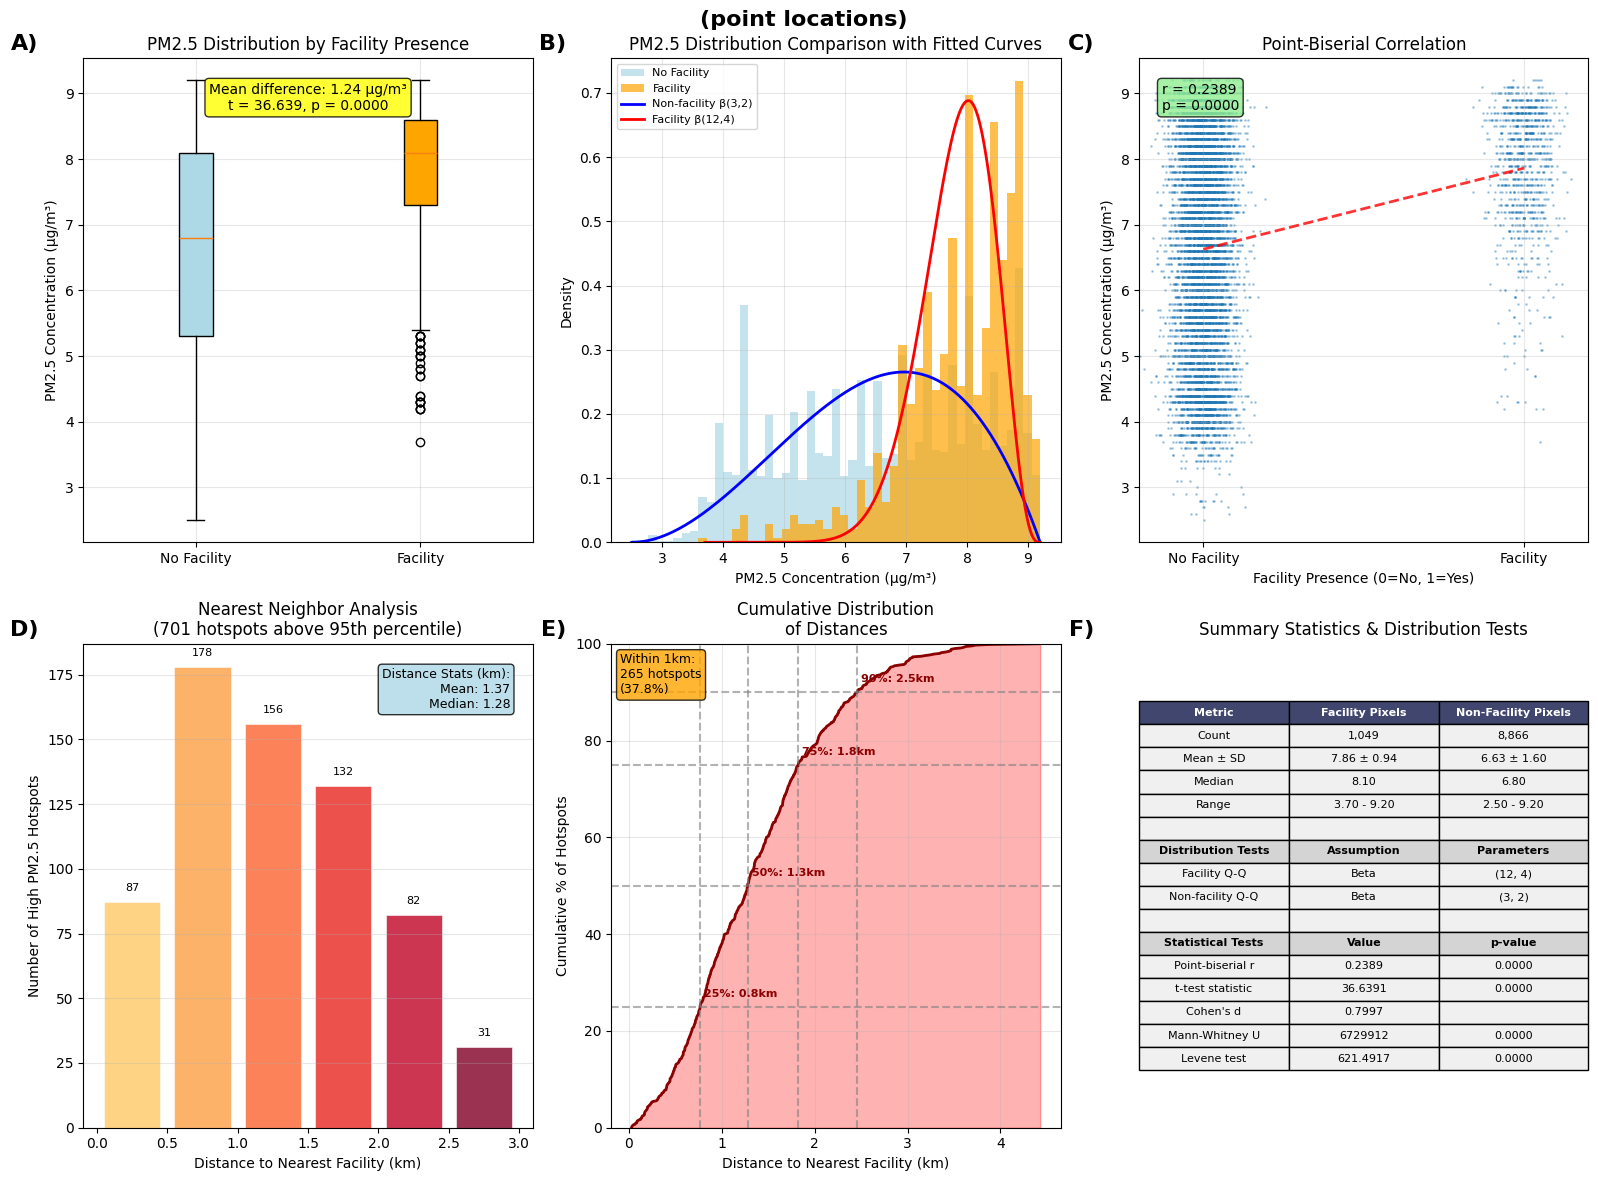

Running nearest neighbor analysis for correlation plot...
Creating nearest neighbor analysis...
✓ High PM2.5 threshold (95th percentile): 8.90 μg/m³
✓ Found 701 high PM2.5 hotspot pixels
✓ Analyzing 1684 facilities
Calculating nearest neighbor distances...
  Processed 701 / 701 hotspots

✓ Nearest neighbor analysis complete!
✓ High PM2.5 hotspots analyzed: 701
✓ Distance statistics (km):
   - Mean distance to nearest facility: 1.37
   - Median distance: 1.28
   - 25th percentile: 0.77
   - 75th percentile: 1.82
   - 95th percentile: 2.81
✓ Hotspots within 1km of facilities: 265 (37.8%)


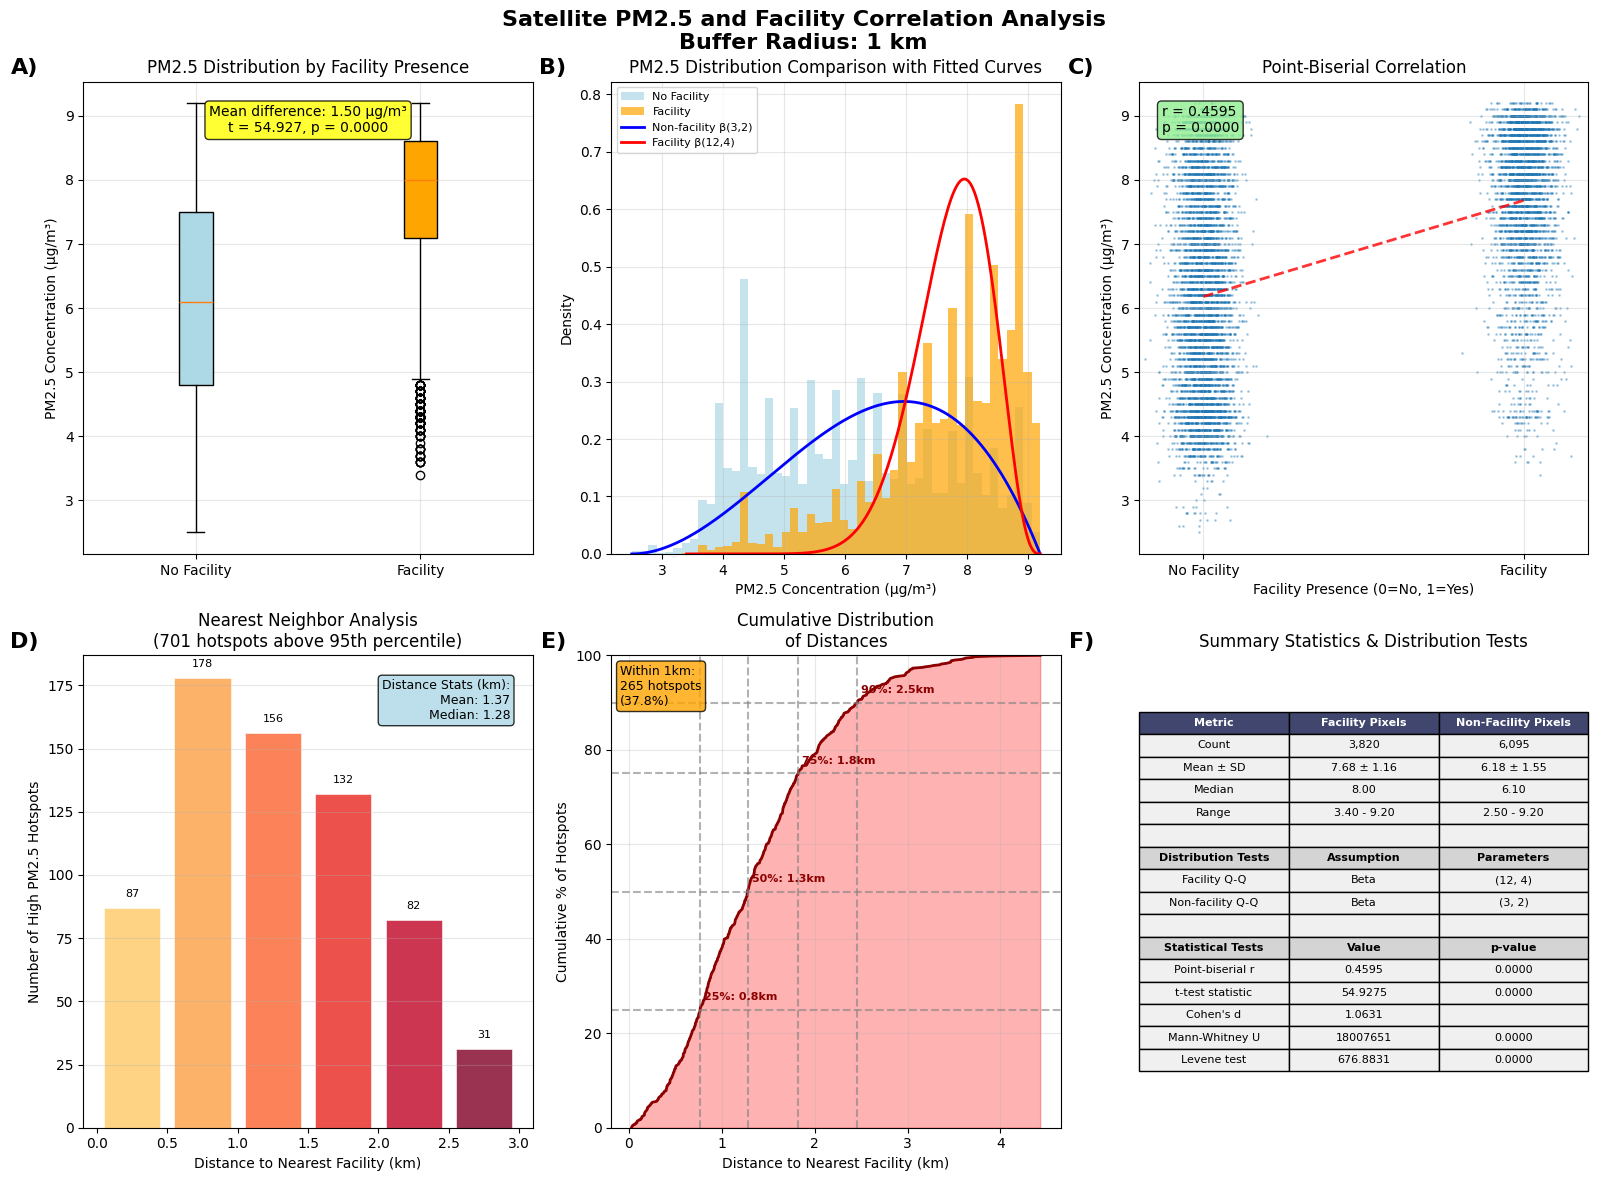

Running nearest neighbor analysis for correlation plot...
Creating nearest neighbor analysis...
✓ High PM2.5 threshold (95th percentile): 8.90 μg/m³
✓ Found 701 high PM2.5 hotspot pixels
✓ Analyzing 1684 facilities
Calculating nearest neighbor distances...
  Processed 701 / 701 hotspots

✓ Nearest neighbor analysis complete!
✓ High PM2.5 hotspots analyzed: 701
✓ Distance statistics (km):
   - Mean distance to nearest facility: 1.37
   - Median distance: 1.28
   - 25th percentile: 0.77
   - 75th percentile: 1.82
   - 95th percentile: 2.81
✓ Hotspots within 1km of facilities: 265 (37.8%)


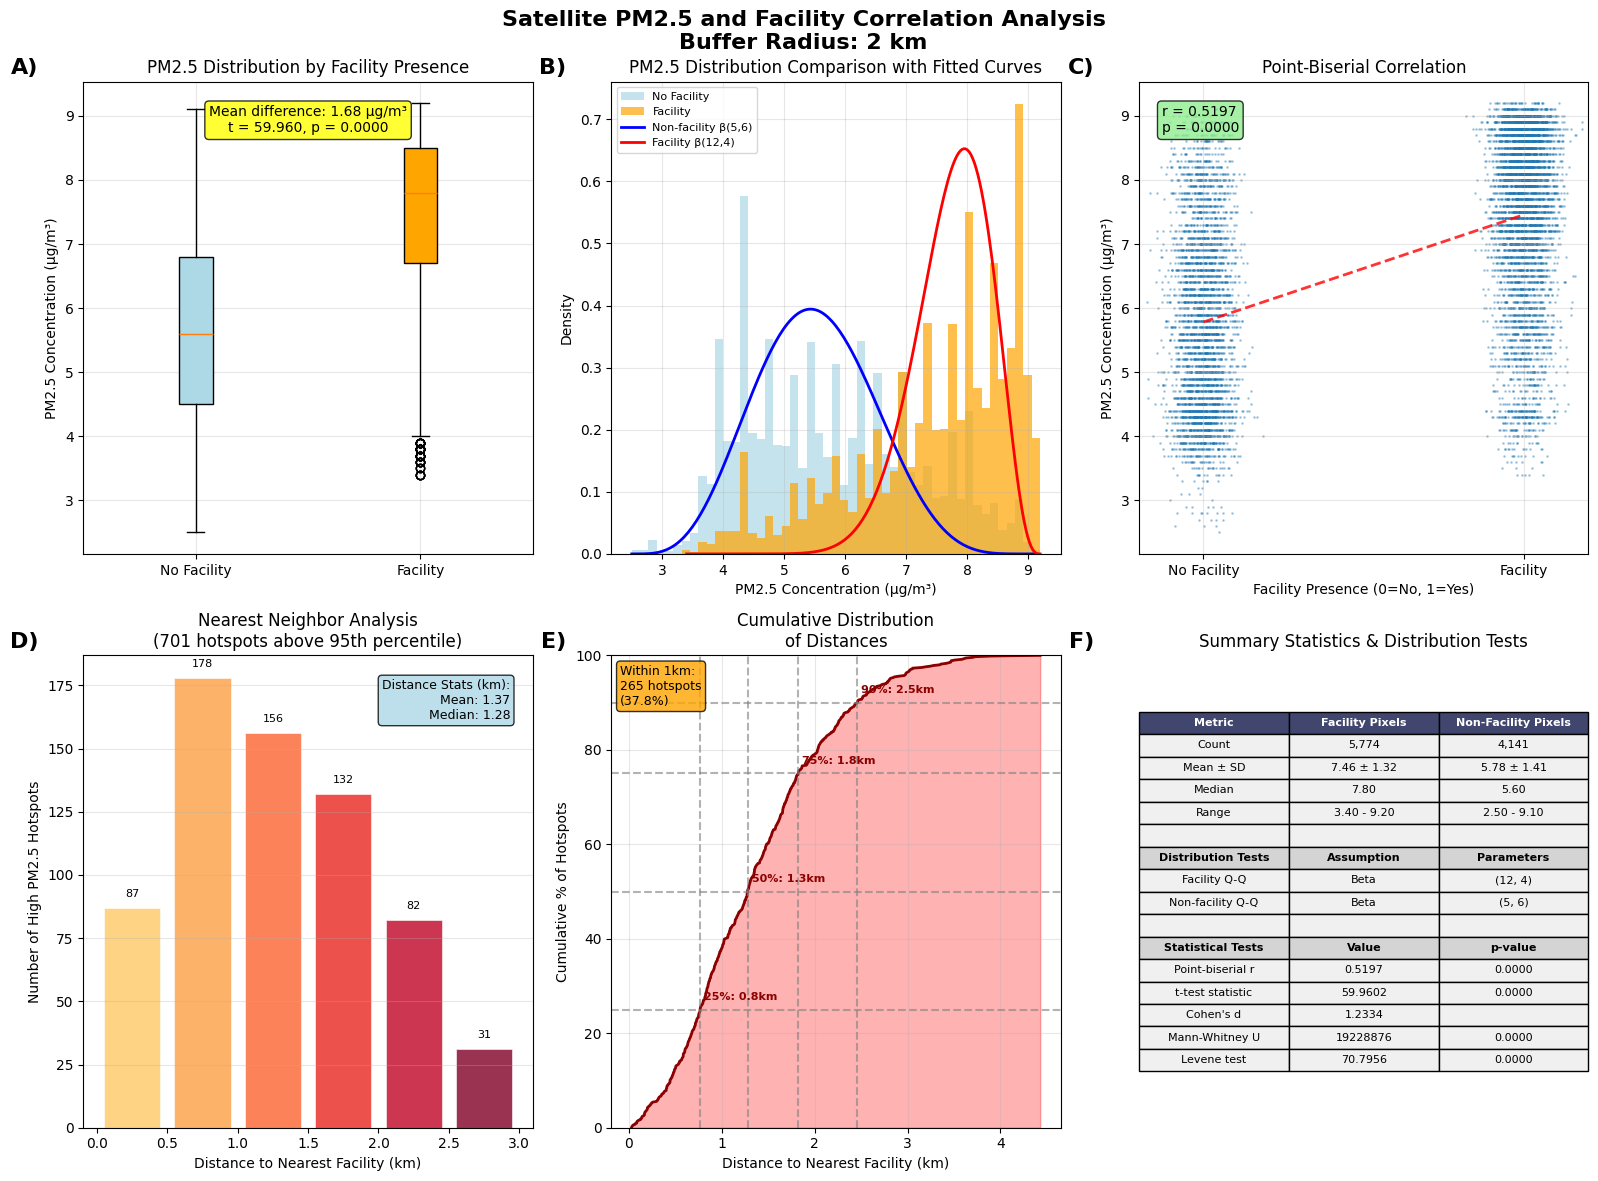


BUFFER RADIUS COMPARISON ANALYSIS

🔄 Analyzing buffer radius: 0

PIXEL-LEVEL CORRELATION ANALYSIS
Buffer radius: 0 (point)
Creating facility presence mask (buffer_radius=0)...
✓ Facility presence mask created
✓ Facility pixels: 1,049 (10.58%)
✓ Non-facility pixels: 8,870 (89.42%)

📊 DATA PREPARATION:
   • Total pixels: 9,919
   • Valid PM2.5 pixels: 9,915
   • Analyzable pixels: 9,915

🏭 FACILITY PRESENCE BREAKDOWN:
   • Pixels with facilities: 1,049
   • Pixels without facilities: 8,866

📈 DESCRIPTIVE STATISTICS:
   Facility pixels PM2.5 (μg/m³):
      Mean: 7.86 ± 0.94
      Median: 8.10
      Range: 3.70 - 9.20
   Non-facility pixels PM2.5 (μg/m³):
      Mean: 6.63 ± 1.60
      Median: 6.80
      Range: 2.50 - 9.20

🔍 STATISTICAL ANALYSIS RESULTS:
   Point-biserial correlation:
      r = 0.2389
      p-value = 0.000000
   Independent samples t-test:
      t-statistic = 36.6391
      p-value = 0.000000
      Cohen's d = 0.7997
   Mann-Whitney U test:
      U-statistic = 6729912
    

In [2]:
# Initialize analyzer
nei_config = {
    'required': {
        'name': 'site name',
        'facility_type': 'facility source type',
        'state': 'postal abbreviation'
    },
    'optional': {
        'pm_annual_ton': 'total emissions',
        'eis': 'eis facility id'
    }
}
analyzer = PM25FacilityAnalyzer(f'{DATA_PATH}/aoipm.tif', f'{DATA_PATH}/DENfacility_NEI.geojson', column_config=nei_config)

results_point = analyzer.analyze_pixel_correlation(buffer_radius=0, sample_size=50000)

# Buffer radius 1 = 3x3 grid around each facility
results_buffer1 = analyzer.analyze_pixel_correlation(buffer_radius=1, sample_size=50000)

# Buffer radius 2 = 5x5 grid around each facility  
results_buffer2 = analyzer.analyze_pixel_correlation(buffer_radius=2, sample_size=50000)

# Create visualizations
if results_point:
    fig1 = analyzer.plot_correlation_analysis(
        results_point,
        facility_dist='beta', 
        facility_params=(12, 4),
        non_facility_dist='beta',
        non_facility_params=(3,2),
        include_nearest_neighbor=True,
        nn_percentile=95,
        nn_bin_width=0.5
        )
    plt.show()

if results_buffer1:
    fig2 = analyzer.plot_correlation_analysis(
        results_buffer1,
        facility_dist='beta', 
        facility_params=(12, 4),
        non_facility_dist='beta',
        non_facility_params=(3,2),
        include_nearest_neighbor=True,
        nn_percentile=95,
        nn_bin_width=0.5)
    plt.show()

if results_buffer1:
    fig2 = analyzer.plot_correlation_analysis(
        results_buffer2,
        facility_dist='beta', 
        facility_params=(12, 4),
        non_facility_dist='beta',
        non_facility_params=(5,6),
        include_nearest_neighbor=True,
        nn_percentile=95,
        nn_bin_width=0.5)
    plt.show()

# Compare different buffer radii
comparison = analyzer.run_buffer_comparison(buffer_radii=[0, 1, 2, 3], sample_size=50000)

Loading data...
✓ Column configuration validated
✓ Loaded PM2.5 raster: (91, 109)
✓ Valid PM2.5 pixels: 9,915
✓ PM2.5 range: 2.5 - 9.2 μg/m³
✓ Loaded 1684 facilities
Creating facility type pie chart...
✓ Using overall PM2.5 threshold (75th percentile): 8.10 μg/m³
Calculating PM2.5 for facilities (point location)...
✓ Facilities with valid PM2.5: 1683
✓ Columns included: ['facility_id', 'plant_name', 'facility_type', 'state', 'pm25', 'sample_count', 'buffer_radius', 'pm_annual_ton', 'eis']
✓ Found 1683 facilities with valid PM2.5 data.
✓ After removing 'Unknown' types, 1683 facilities remain for plotting.
✓ Facility type pie chart created
✓ Buffer configuration: 0 (point)
✓ Showing top 7 types + Others (83 facilities)
✓ Facilities above overall threshold breakdown:
   - Gasoline/Diesel Service Station: 278 facilities (avg PM2.5: 8.50 μg/m³)
   - Auto Body, Painting, or Repair Shop: 59 facilities (avg PM2.5: 8.58 μg/m³)
   - Concrete Batch Plant: 25 facilities (avg PM2.5: 8.70 μg/m³)
   

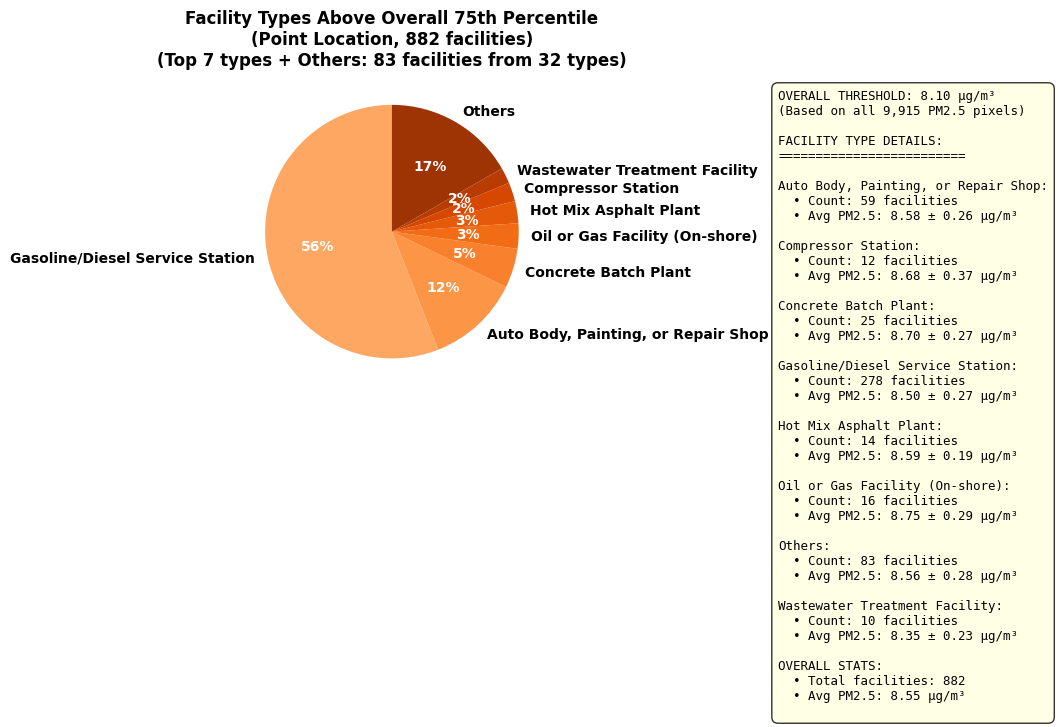

Creating facility type pie chart...
✓ Using overall PM2.5 threshold (75th percentile): 8.10 μg/m³
Calculating PM2.5 for facilities (3×3 buffer)...
✓ Facilities with valid PM2.5: 1684
✓ Columns included: ['facility_id', 'plant_name', 'facility_type', 'state', 'pm25', 'sample_count', 'buffer_radius', 'pm_annual_ton', 'eis']
✓ Found 1684 facilities with valid PM2.5 data.
✓ After removing 'Unknown' types, 1684 facilities remain for plotting.
✓ Facility type pie chart created
✓ Buffer configuration: 1 (3×3)
✓ Showing top 7 types + Others (99 facilities)
✓ Facilities above overall threshold breakdown:
   - Gasoline/Diesel Service Station: 325 facilities (avg PM2.5: 8.58 μg/m³)
   - Auto Body, Painting, or Repair Shop: 72 facilities (avg PM2.5: 8.62 μg/m³)
   - Concrete Batch Plant: 28 facilities (avg PM2.5: 8.74 μg/m³)
   - Oil or Gas Facility (On-shore): 17 facilities (avg PM2.5: 8.84 μg/m³)
   - Hot Mix Asphalt Plant: 15 facilities (avg PM2.5: 8.67 μg/m³)
   - Institutional (school, hospit

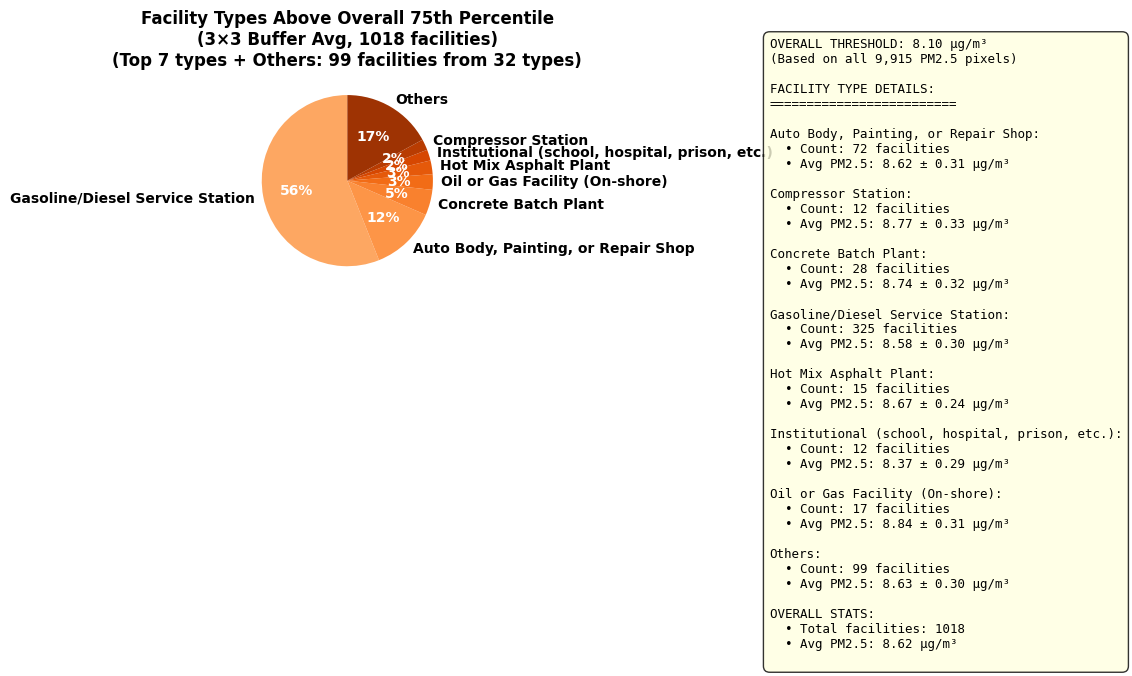

Creating facility type pie chart...
✓ Using overall PM2.5 threshold (0th percentile): 2.50 μg/m³
Calculating PM2.5 for facilities (point location)...
✓ Facilities with valid PM2.5: 1683
✓ Columns included: ['facility_id', 'plant_name', 'facility_type', 'state', 'pm25', 'sample_count', 'buffer_radius', 'pm_annual_ton', 'eis']
✓ Found 1683 facilities with valid PM2.5 data.
✓ After removing 'Unknown' types, 1683 facilities remain for plotting.
✓ Facility type pie chart created
✓ Buffer configuration: 0 (point)
✓ Showing top 7 types + Others (139 facilities)
✓ Facilities above overall threshold breakdown:
   - Gasoline/Diesel Service Station: 631 facilities (avg PM2.5: 7.77 μg/m³)
   - Auto Body, Painting, or Repair Shop: 133 facilities (avg PM2.5: 7.92 μg/m³)
   - Concrete Batch Plant: 36 facilities (avg PM2.5: 8.33 μg/m³)
   - Institutional (school, hospital, prison, etc.): 27 facilities (avg PM2.5: 7.78 μg/m³)
   - Oil or Gas Facility (On-shore): 20 facilities (avg PM2.5: 8.55 μg/m³)
  

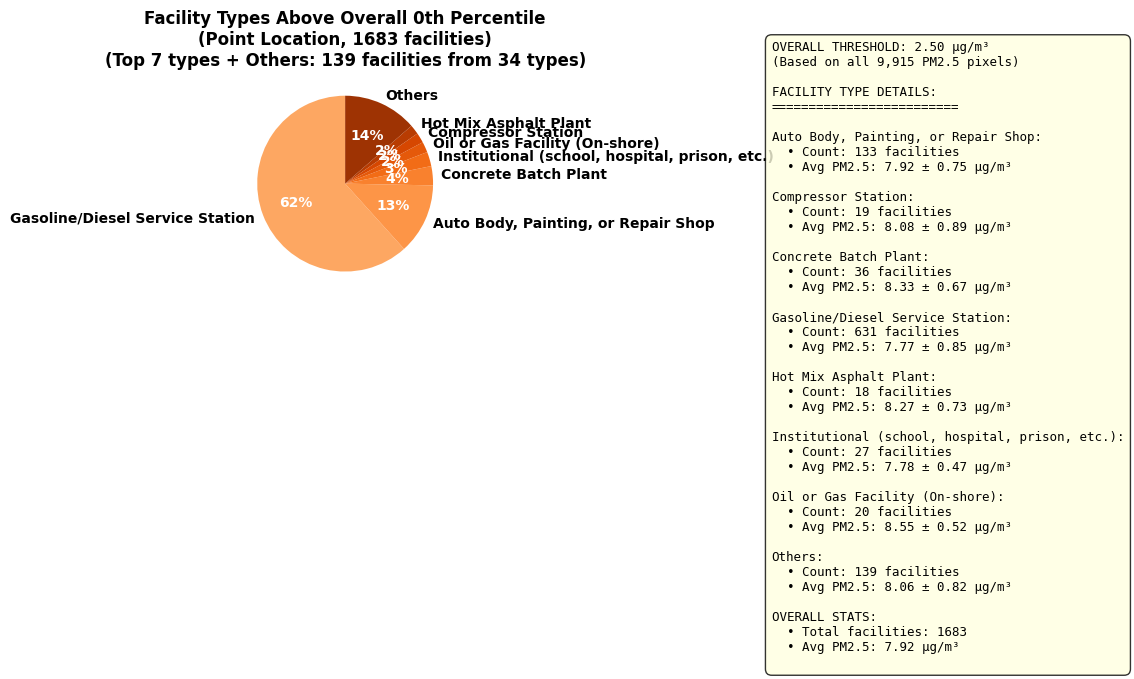

In [4]:
# Initialize analyzer
nei_config = {
    'required': {
        'name': 'site name',
        'facility_type': 'facility source type',
        'state': 'postal abbreviation'
    },
    'optional': {
        'pm_annual_ton': 'total emissions',
        'eis': 'eis facility id'
    }
}
analyzer = PM25FacilityAnalyzer(f'{DATA_PATH}/aoipm.tif', f'{DATA_PATH}/DENfacility_NEI.geojson', column_config=nei_config)

# # Load EIS categories and merge with facility data
# analyzer.load_eis_categories(f'{DATA_PATH}/NEI_Category_by_eis.csv')

# Point location fuel types
fig5 = analyzer.plot_facility_type_pie_chart(buffer_radius=0, percentile=75)
plt.show()

# 3x3 buffer fuel types
fig6 = analyzer.plot_facility_type_pie_chart(buffer_radius=1, percentile=75)
plt.show()

# 3x3 buffer fuel types
fig7 = analyzer.plot_facility_type_pie_chart(buffer_radius=0, percentile=0)
plt.show()

# Louisiana PM and Facility

Loading data...
✓ Column configuration validated
✓ Loaded PM2.5 raster: (416, 528)
✓ Valid PM2.5 pixels: 178,893
✓ PM2.5 range: 6.2 - 15.9 μg/m³
✓ Loaded 896 facilities

PIXEL-LEVEL CORRELATION ANALYSIS
Buffer radius: 0 (point)
Creating facility presence mask (buffer_radius=0)...
✓ Facility presence mask created
✓ Facility pixels: 796 (0.36%)
✓ Non-facility pixels: 218,852 (99.64%)

📊 DATA PREPARATION:
   • Total pixels: 219,648
   • Valid PM2.5 pixels: 178,893
   • Analyzable pixels: 178,893

🏭 FACILITY PRESENCE BREAKDOWN:
   • Pixels with facilities: 786
   • Pixels without facilities: 178,107

📈 DESCRIPTIVE STATISTICS:
   Facility pixels PM2.5 (μg/m³):
      Mean: 9.79 ± 1.06
      Median: 9.50
      Range: 7.10 - 14.00
   Non-facility pixels PM2.5 (μg/m³):
      Mean: 9.59 ± 1.09
      Median: 9.20
      Range: 6.20 - 15.90

🔍 STATISTICAL ANALYSIS RESULTS:
   Point-biserial correlation:
      r = 0.0121
      p-value = 0.000000
   Independent samples t-test:
      t-statistic = 5.2

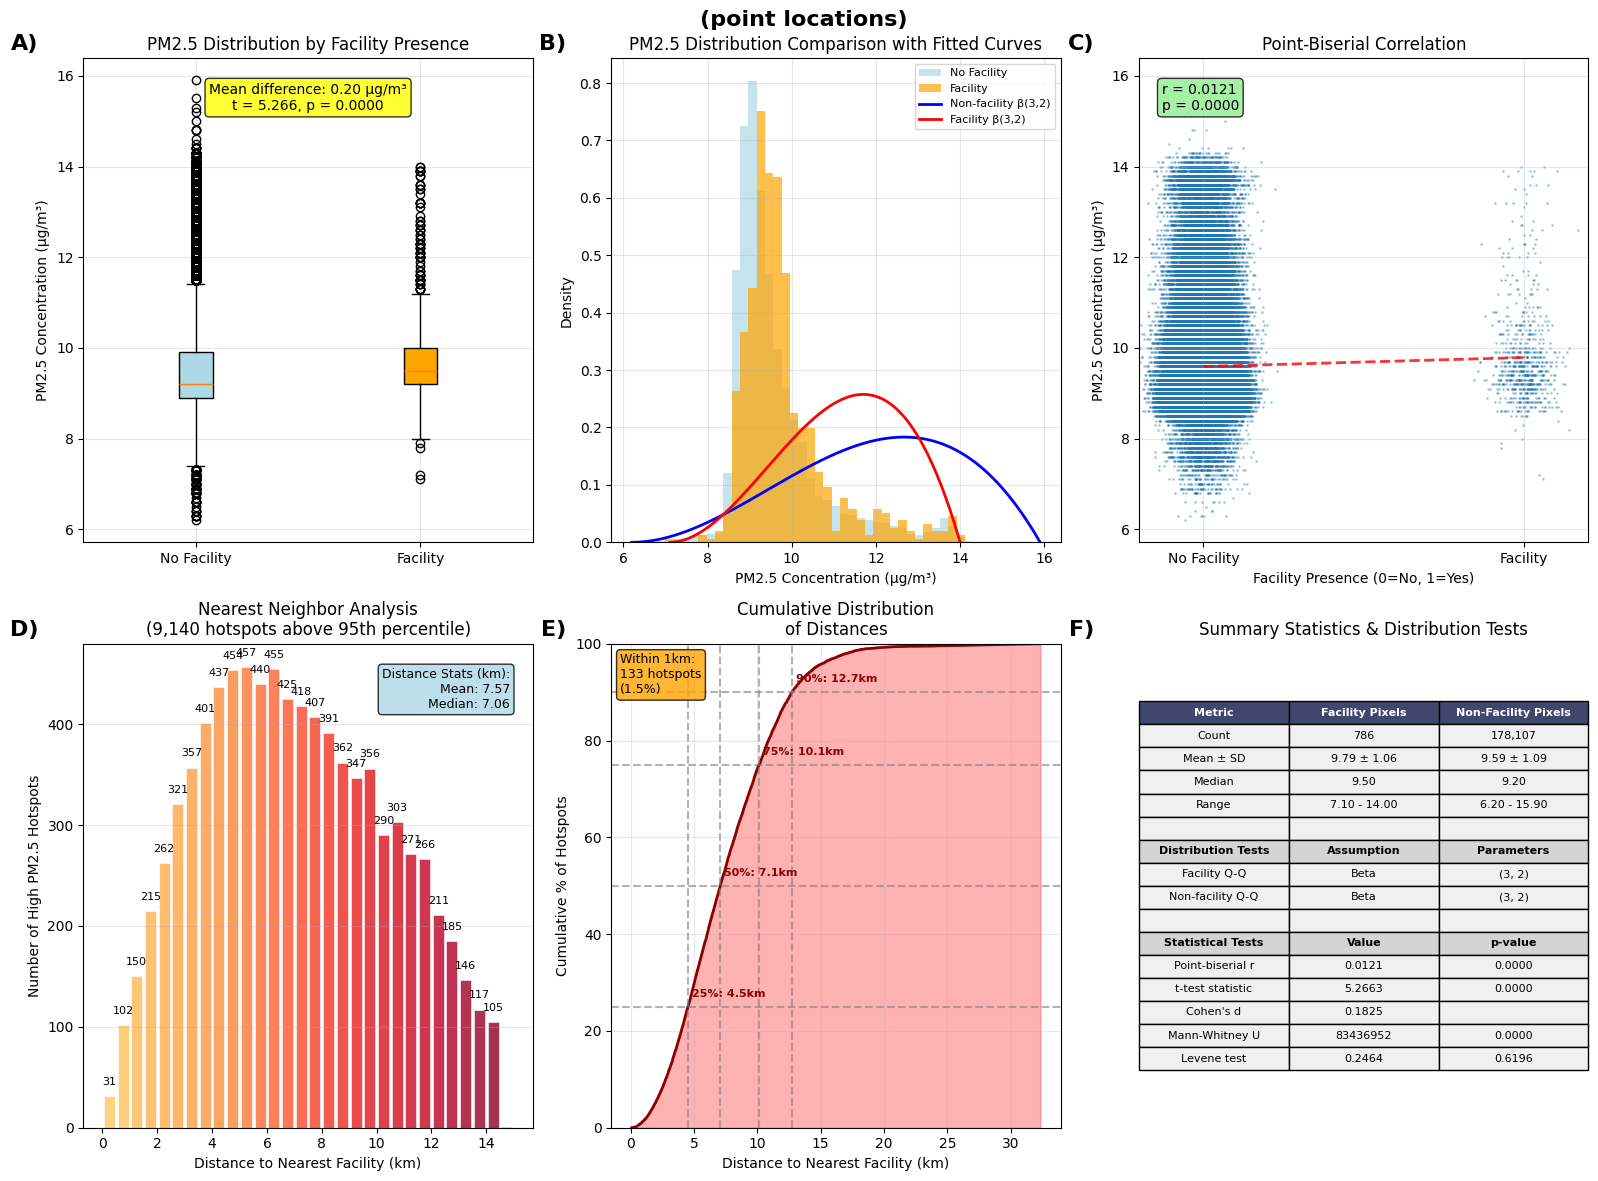

Running nearest neighbor analysis for correlation plot...
Creating nearest neighbor analysis...
✓ High PM2.5 threshold (95th percentile): 12.10 μg/m³
✓ Found 9,140 high PM2.5 hotspot pixels
✓ Analyzing 896 facilities
Calculating nearest neighbor distances...
  Processed 9,140 / 9,140 hotspots

✓ Nearest neighbor analysis complete!
✓ High PM2.5 hotspots analyzed: 9,140
✓ Distance statistics (km):
   - Mean distance to nearest facility: 7.57
   - Median distance: 7.06
   - 25th percentile: 4.51
   - 75th percentile: 10.14
   - 95th percentile: 14.51
✓ Hotspots within 1km of facilities: 133 (1.5%)


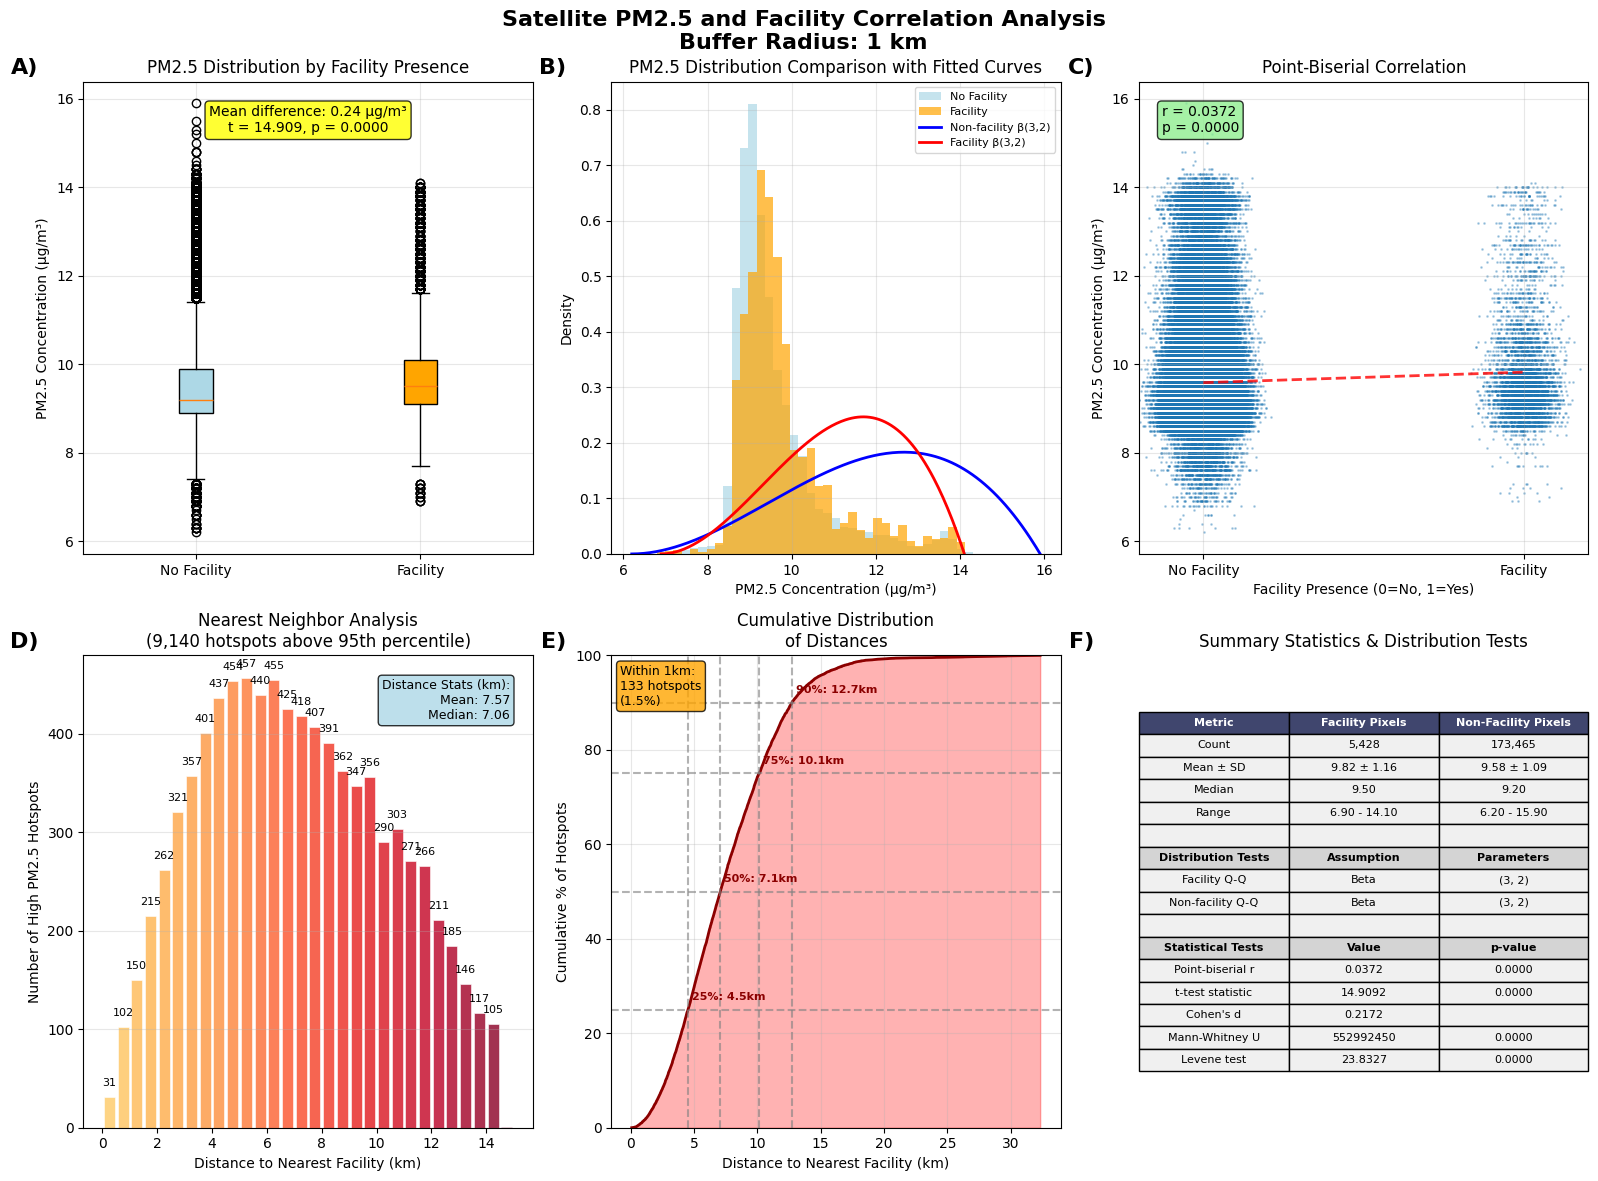


BUFFER RADIUS COMPARISON ANALYSIS

🔄 Analyzing buffer radius: 0

PIXEL-LEVEL CORRELATION ANALYSIS
Buffer radius: 0 (point)
Creating facility presence mask (buffer_radius=0)...
✓ Facility presence mask created
✓ Facility pixels: 796 (0.36%)
✓ Non-facility pixels: 218,852 (99.64%)

📊 DATA PREPARATION:
   • Total pixels: 219,648
   • Valid PM2.5 pixels: 178,893
   • Analyzable pixels: 178,893
   • Sampled pixels for analysis: 50,000

🏭 FACILITY PRESENCE BREAKDOWN:
   • Pixels with facilities: 191
   • Pixels without facilities: 49,809

📈 DESCRIPTIVE STATISTICS:
   Facility pixels PM2.5 (μg/m³):
      Mean: 9.65 ± 0.96
      Median: 9.40
      Range: 7.80 - 13.60
   Non-facility pixels PM2.5 (μg/m³):
      Mean: 9.59 ± 1.09
      Median: 9.20
      Range: 6.30 - 14.80

🔍 STATISTICAL ANALYSIS RESULTS:
   Point-biserial correlation:
      r = 0.0039
      p-value = 0.381848
   Independent samples t-test:
      t-statistic = 0.9911
      p-value = 0.322887
      Cohen's d = 0.0634
   Mann-Wh

In [2]:
# Initialize analyzer
nei_config = {
    'required': {
        'name': 'site name',
        'facility_type': 'facility source type',
        'state': 'postal abbreviation'
    },
    'optional': {
        'pm_annual_ton': 'total emissions',
        'eis': 'eis facility id'
    }
}
LA_analyzer = PM25FacilityAnalyzer(f'{DATA_PATH}/LA_pm.tif', f'{DATA_PATH}/LAfacility_NEI.geojson', column_config=nei_config)

LA_results_point = LA_analyzer.analyze_pixel_correlation(buffer_radius=0, sample_size=500000)

# Buffer radius 1 = 3x3 grid around each facility
LA_results_buffer1 = LA_analyzer.analyze_pixel_correlation(buffer_radius=1, sample_size=500000)

# Buffer radius 2 = 5x5 grid around each facility  
LA_results_buffer2 = LA_analyzer.analyze_pixel_correlation(buffer_radius=2, sample_size=500000)

# Create visualizations
if LA_results_point:
    fig1 = LA_analyzer.plot_correlation_analysis(
        LA_results_point,
        facility_dist='beta', 
        facility_params=(3, 2),
        non_facility_dist='beta',
        non_facility_params=(3,2),
        include_nearest_neighbor=True,
        nn_percentile=95,
        nn_bin_width=0.5
        )
    plt.show()

if LA_results_buffer1:
    fig2 = LA_analyzer.plot_correlation_analysis(
        LA_results_buffer1,
        facility_dist='beta', 
        facility_params=(3, 2),
        non_facility_dist='beta',
        non_facility_params=(3,2),
        include_nearest_neighbor=True,
        nn_percentile=95,
        nn_bin_width=0.5)
    plt.show()

# Compare different buffer radii
comparison = LA_analyzer.run_buffer_comparison(buffer_radii=[0, 1, 2, 3], sample_size=50000)

Loading data...
✓ Column configuration validated
✓ Loaded PM2.5 raster: (416, 528)
✓ Valid PM2.5 pixels: 178,893
✓ PM2.5 range: 6.2 - 15.9 μg/m³
✓ Loaded 896 facilities

--- Loading and Merging EIS Facility Categories ---
✓ Loaded 32517 EIS facility categories from CSV.
✓ Updating 'facility_type' to use the new 'Category' column for all subsequent analysis.
✓ Merge complete:
   • Total facilities: 896
   • Facilities matched with an EIS category: 527
   • Match rate: 58.8%
✓ Top 5 new facility categories:
Category
Unknown              369
Oil & Gas            265
Manufacturing         47
Chemicals - Other     38
Facilities            28

FACILITY TYPE CORRELATION ANALYSIS
Buffer radius: 0, Category column: Category
Creating facility type masks (buffer_radius=0)...
✓ Found 22 facility categories
   • Oil & Gas: 265 facilities, 248 pixels
   • Unknown: 369 facilities, 353 pixels
   • Other - Other: 20 facilities, 19 pixels
   • Facilities: 28 facilities, 27 pixels
   • Manufacturing: 47 

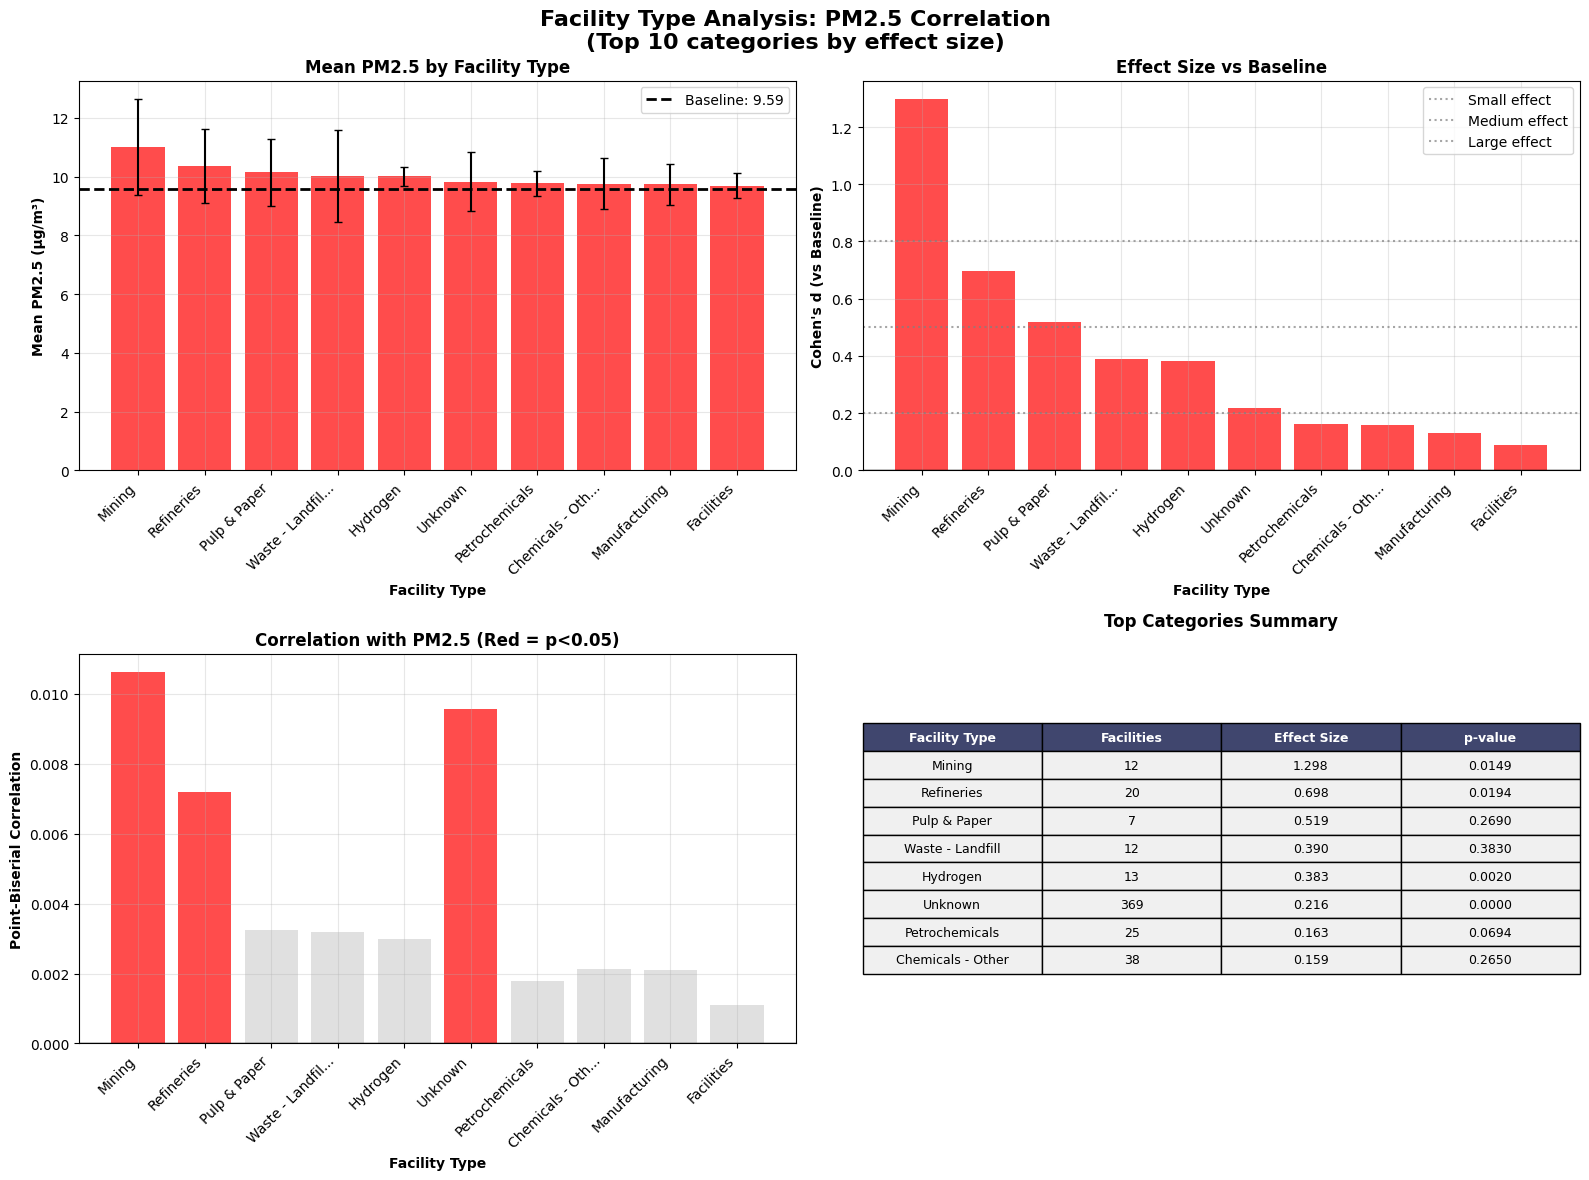

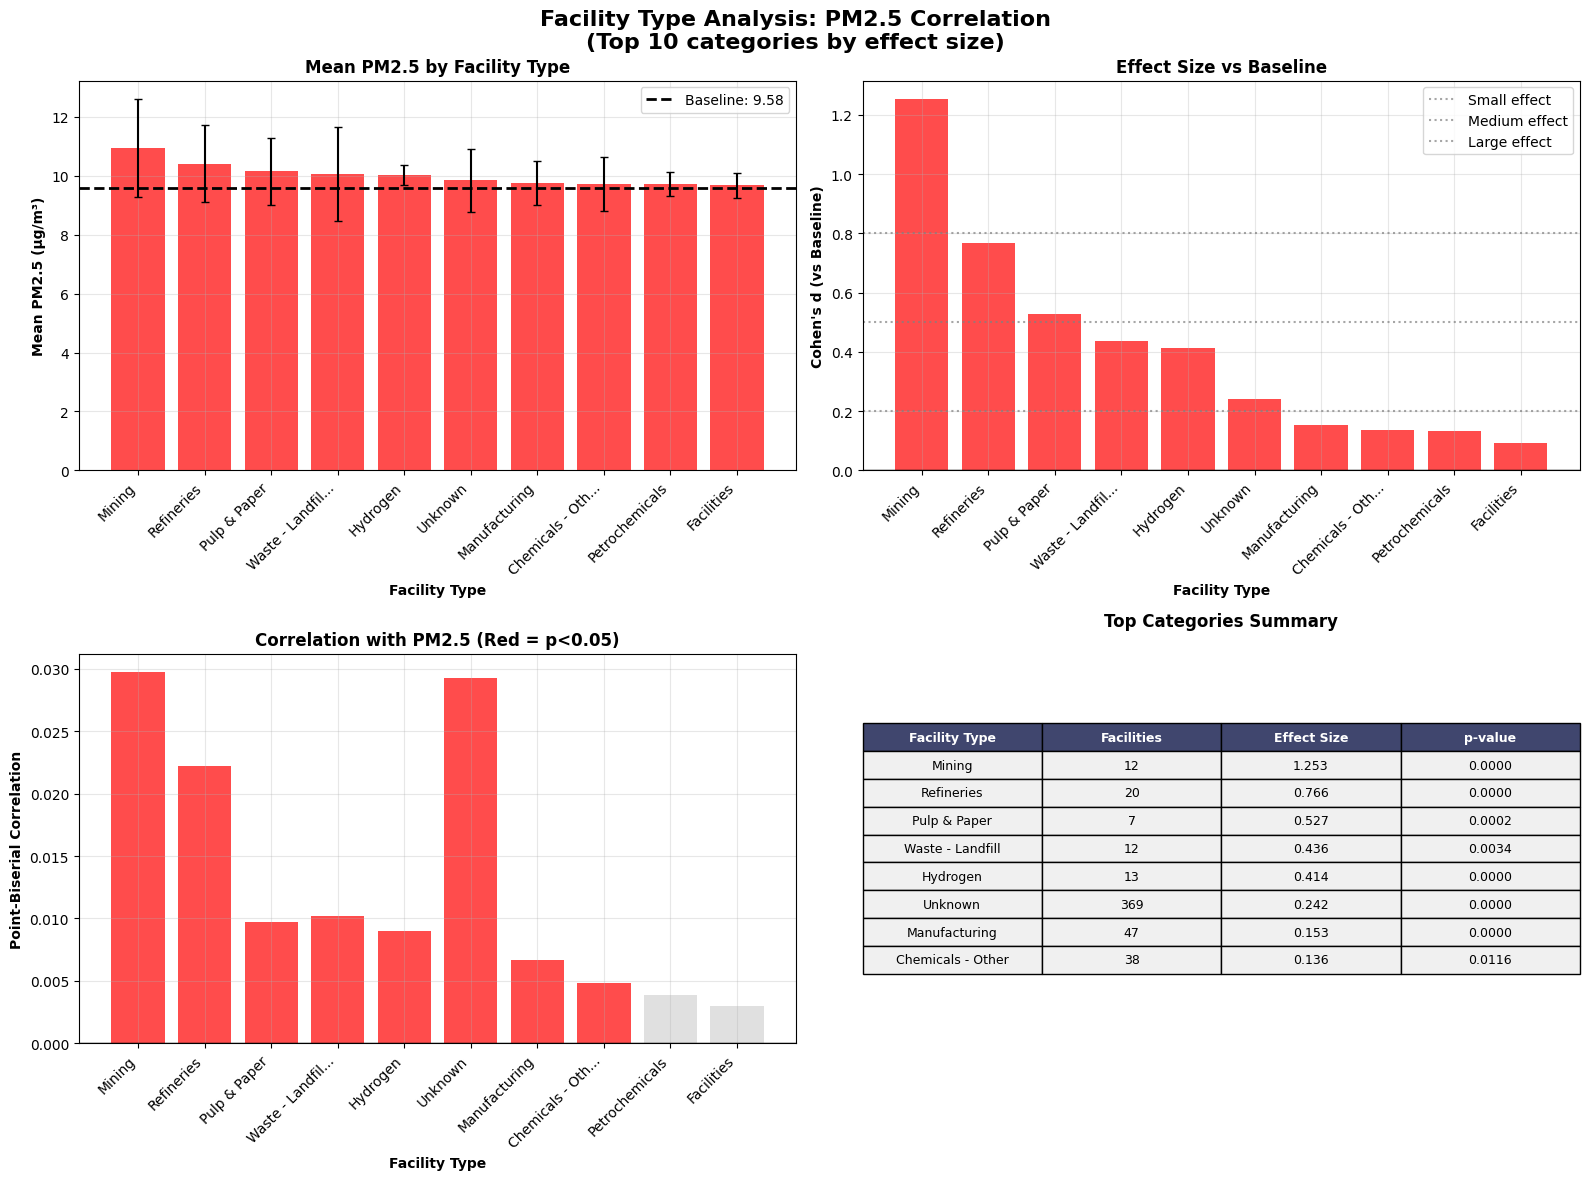

In [3]:
# Initialize analyzer
nei_config = {
    'required': {
        'name': 'site name',
        'facility_type': 'facility source type',
        'state': 'postal abbreviation'
    },
    'optional': {
        'pm_annual_ton': 'total emissions',
        'eis': 'eis facility id'
    }
}
LA_analyzer = PM25FacilityAnalyzer(f'{DATA_PATH}/LA_pm.tif', f'{DATA_PATH}/LAfacility_NEI.geojson', column_config=nei_config)

# Load EIS categories and merge with facility data
LA_analyzer.load_eis_categories(f'{DATA_PATH}/NEI_Category_by_eis.csv')

# Analyze facility types with point locations
results_point = LA_analyzer.analyze_facility_types_correlation(
    buffer_radius=0, 
    category_col='Category',
    sample_size=500000,
    min_facilities=5
)

# Analyze facility types with buffer
results_buffer = LA_analyzer.analyze_facility_types_correlation(
    buffer_radius=1, 
    category_col='Category', 
    sample_size=500000,
    min_facilities=5
)

# Create visualizations
if results_point:
    fig1 = LA_analyzer.plot_facility_types_analysis(results_point, top_n=10)
    plt.show()

if results_buffer:
    fig2 = LA_analyzer.plot_facility_types_analysis(results_buffer, top_n=10)
    plt.show()



PIXEL-LEVEL CORRELATION ANALYSIS
Buffer radius: 0 (point)
Creating facility presence mask (buffer_radius=0)...
✓ Facility presence mask created
✓ Facility pixels: 796 (0.36%)
✓ Non-facility pixels: 218,852 (99.64%)

📊 DATA PREPARATION:
   • Total pixels: 219,648
   • Valid PM2.5 pixels: 178,893
   • Analyzable pixels: 178,893

🏭 FACILITY PRESENCE BREAKDOWN:
   • Pixels with facilities: 786
   • Pixels without facilities: 178,107

📈 DESCRIPTIVE STATISTICS:
   Facility pixels PM2.5 (μg/m³):
      Mean: 9.79 ± 1.06
      Median: 9.50
      Range: 7.10 - 14.00
   Non-facility pixels PM2.5 (μg/m³):
      Mean: 9.59 ± 1.09
      Median: 9.20
      Range: 6.20 - 15.90

🔍 STATISTICAL ANALYSIS RESULTS:
   Point-biserial correlation:
      r = 0.0121
      p-value = 0.000000
   Independent samples t-test:
      t-statistic = 5.2663
      p-value = 0.000000
      Cohen's d = 0.1825
   Mann-Whitney U test:
      U-statistic = 83436952
      p-value = 0.000000
   Levene's test (equal variances):
 

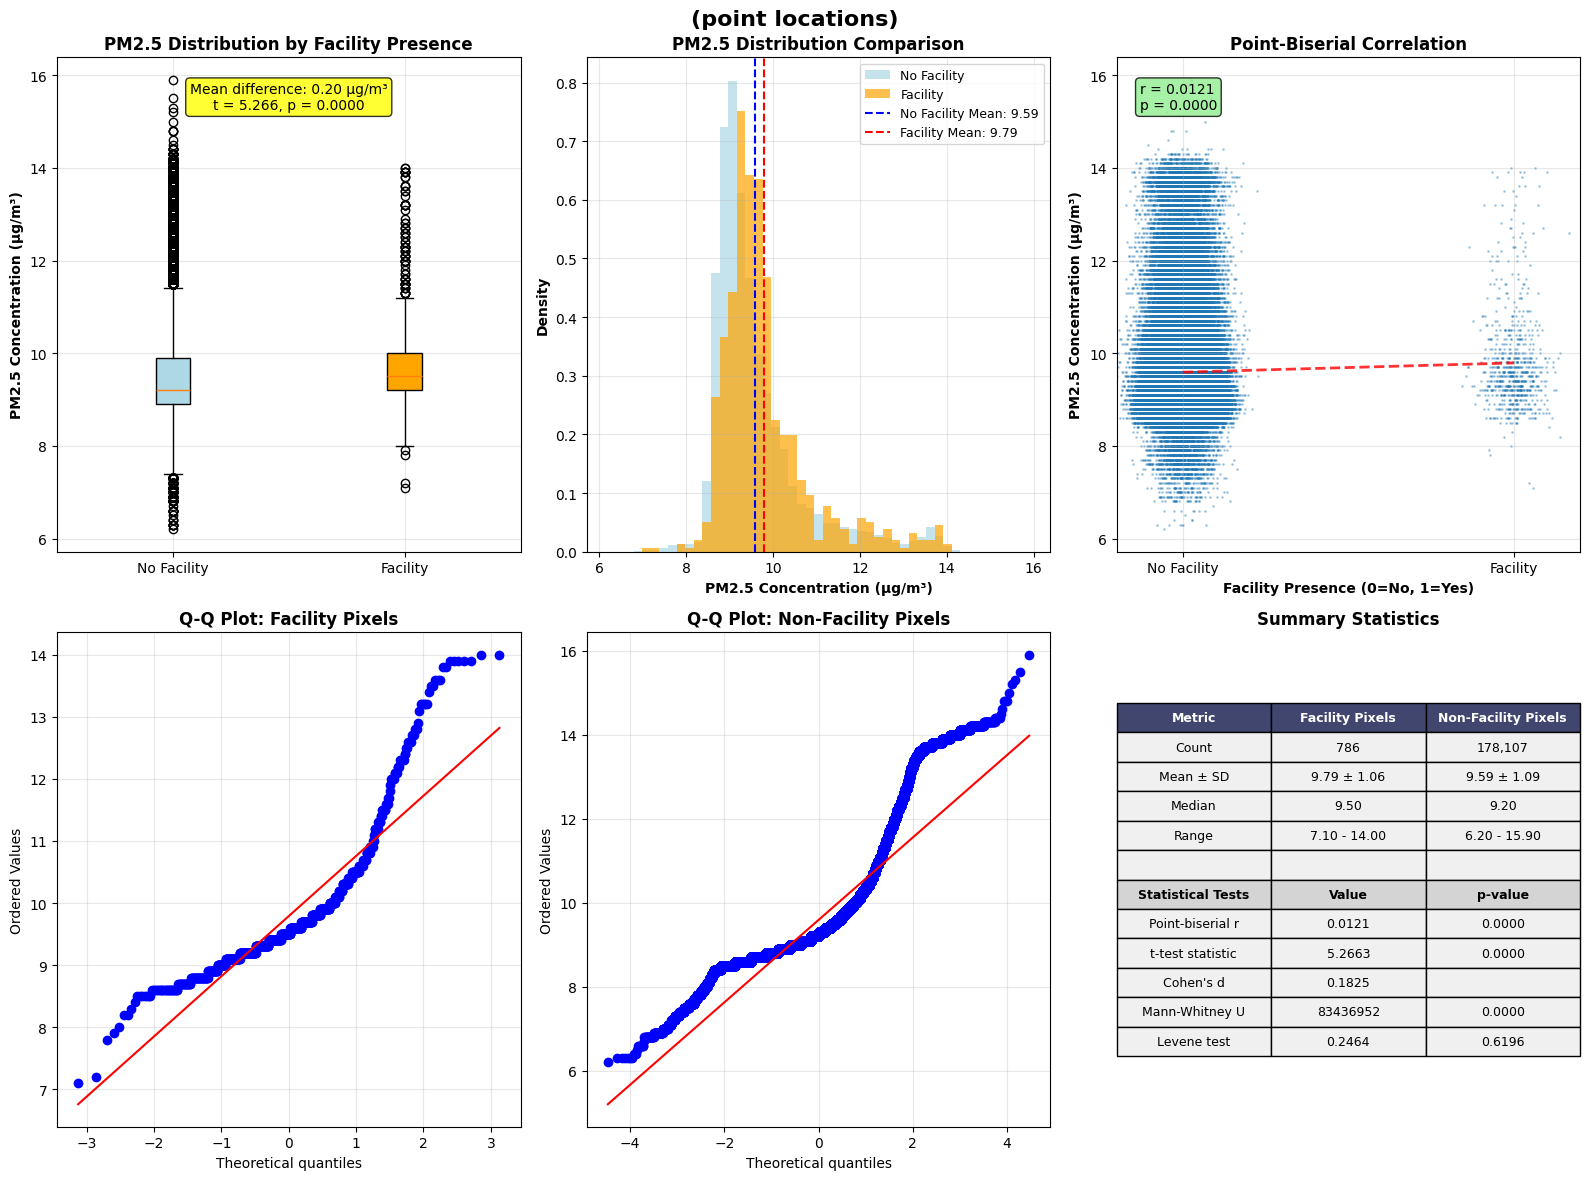

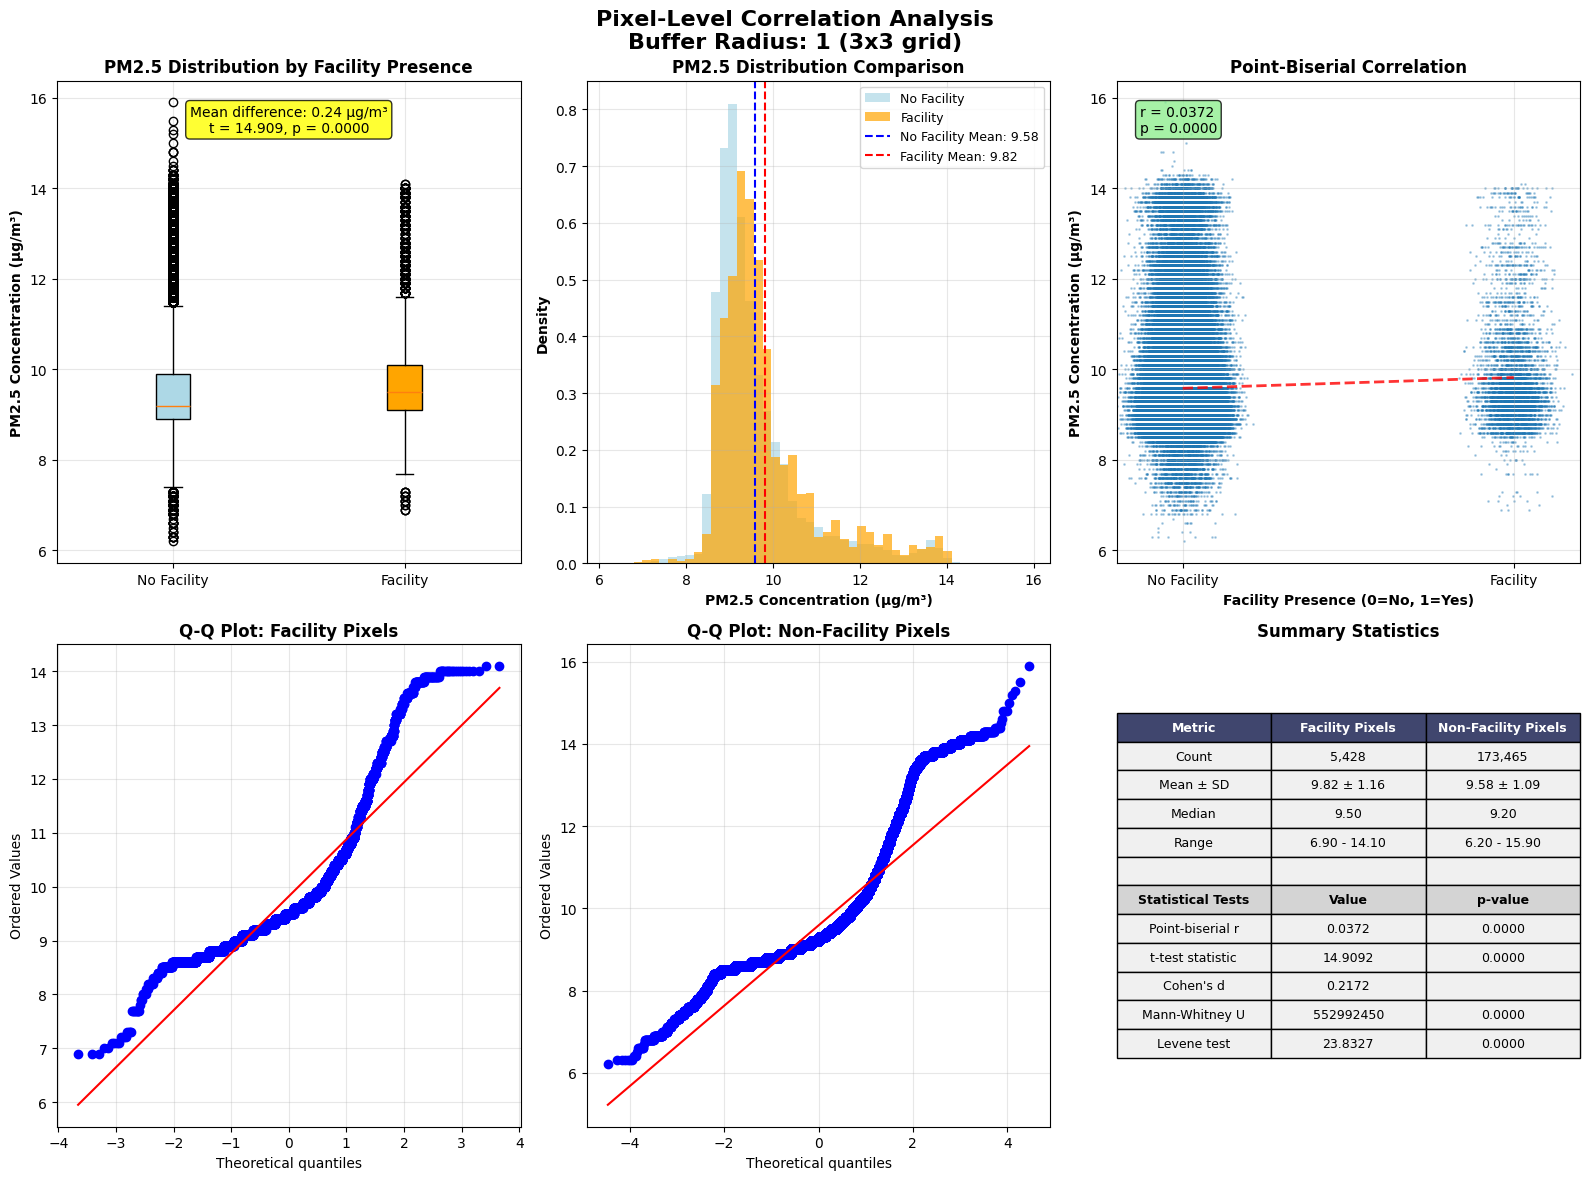


BUFFER RADIUS COMPARISON ANALYSIS

🔄 Analyzing buffer radius: 0

PIXEL-LEVEL CORRELATION ANALYSIS
Buffer radius: 0 (point)
Creating facility presence mask (buffer_radius=0)...
✓ Facility presence mask created
✓ Facility pixels: 75 (0.76%)
✓ Non-facility pixels: 9,844 (99.24%)

📊 DATA PREPARATION:
   • Total pixels: 9,919
   • Valid PM2.5 pixels: 9,915
   • Analyzable pixels: 9,915

🏭 FACILITY PRESENCE BREAKDOWN:
   • Pixels with facilities: 75
   • Pixels without facilities: 9,840

📈 DESCRIPTIVE STATISTICS:
   Facility pixels PM2.5 (μg/m³):
      Mean: 7.40 ± 1.29
      Median: 7.70
      Range: 4.30 - 9.10
   Non-facility pixels PM2.5 (μg/m³):
      Mean: 6.75 ± 1.59
      Median: 7.00
      Range: 2.50 - 9.20

🔍 STATISTICAL ANALYSIS RESULTS:
   Point-biserial correlation:
      r = 0.0354
      p-value = 0.000423
   Independent samples t-test:
      t-statistic = 4.3009
      p-value = 0.000050
      Cohen's d = 0.4088
   Mann-Whitney U test:
      U-statistic = 454874
      p-value

In [ ]:
results_point = LA_analyzer.analyze_pixel_correlation(buffer_radius=0, sample_size=500000)

# Buffer radius 1 = 3x3 grid around each facility
results_buffer1 = LA_analyzer.analyze_pixel_correlation(buffer_radius=1, sample_size=500000)

# Buffer radius 2 = 5x5 grid around each facility  
results_buffer2 = LA_analyzer.analyze_pixel_correlation(buffer_radius=2, sample_size=500000)

# Create visualizations
if results_point:
    fig1 = LA_analyzer.plot_correlation_analysis(results_point)
    plt.show()

if results_buffer1:
    fig2 = LA_analyzer.plot_correlation_analysis(results_buffer2)
    plt.show()

# Compare different buffer radii
comparison = analyzer.run_buffer_comparison(buffer_radii=[0, 1, 2, 3], sample_size=50000)

Loading data...
✓ Column configuration validated
✓ Loaded PM2.5 raster: (416, 528)
✓ Valid PM2.5 pixels: 178,893
✓ PM2.5 range: 6.2 - 15.9 μg/m³
✓ Loaded 896 facilities
✓ Overall PM2.5 distribution plot created
✓ Threshold (95th percentile): 12.10 μg/m³
✓ Pixels above threshold: 9,140 (5.1%)
Creating facility PM2.5 distribution plot...
✓ Using overall PM2.5 threshold (75th percentile): 9.90 μg/m³
Calculating PM2.5 for facilities (point location)...
✓ Facilities with valid PM2.5: 885
✓ Columns included: ['facility_id', 'plant_name', 'facility_type', 'state', 'pm25', 'sample_count', 'buffer_radius', 'pm_annual_ton']
✓ Facilities above overall threshold: 287
✓ Facilities below overall threshold: 598
✓ Facility PM2.5 distribution plot created
✓ Buffer configuration: 0 (point)


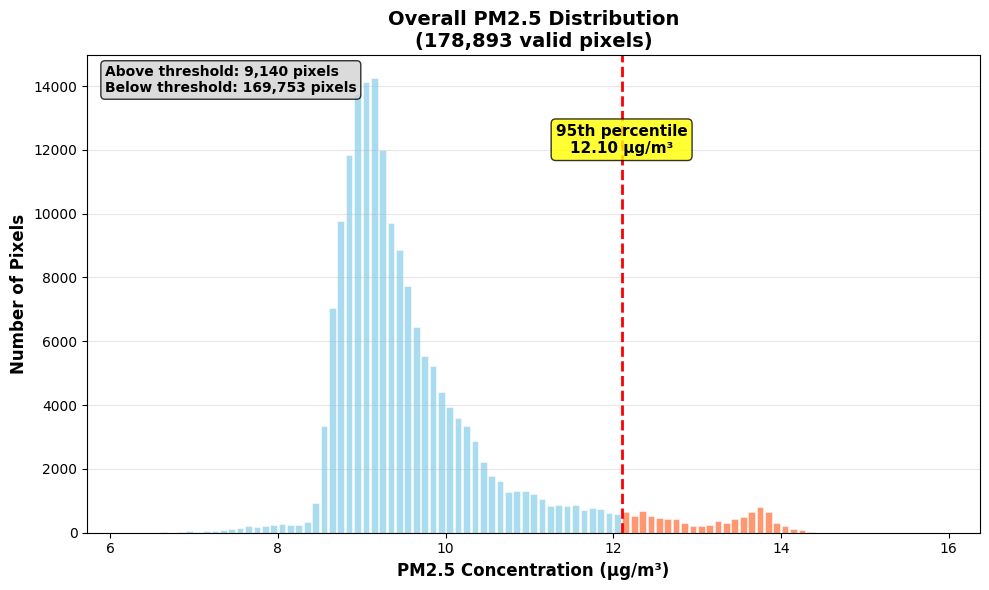

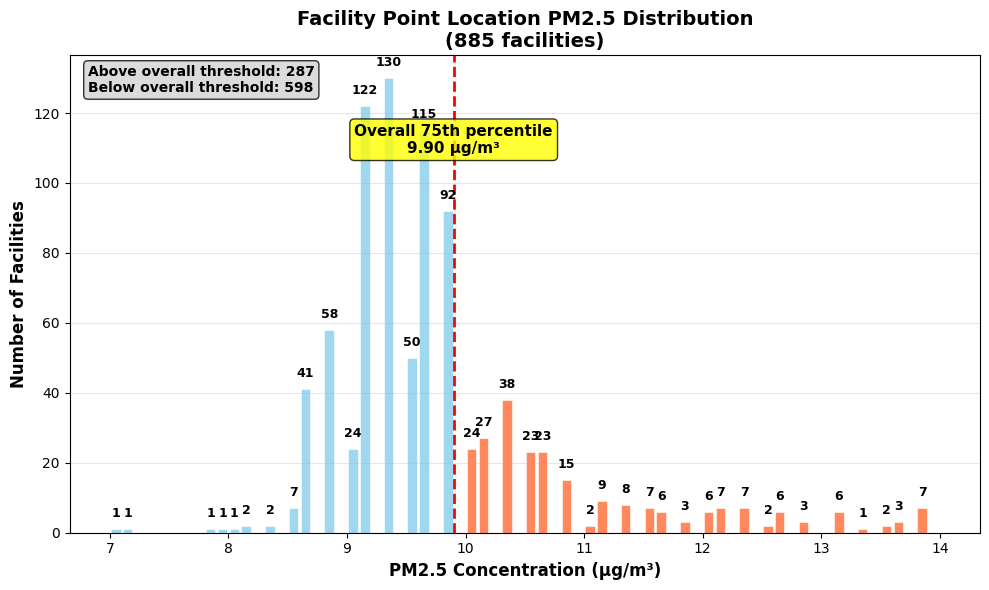

Creating facility PM2.5 distribution plot...
✓ Using overall PM2.5 threshold (75th percentile): 9.90 μg/m³
Calculating PM2.5 for facilities (3×3 buffer)...
✓ Facilities with valid PM2.5: 887
✓ Columns included: ['facility_id', 'plant_name', 'facility_type', 'state', 'pm25', 'sample_count', 'buffer_radius', 'pm_annual_ton']
✓ Facilities above overall threshold: 326
✓ Facilities below overall threshold: 561
✓ Facility PM2.5 distribution plot created
✓ Buffer configuration: 1 (3×3)


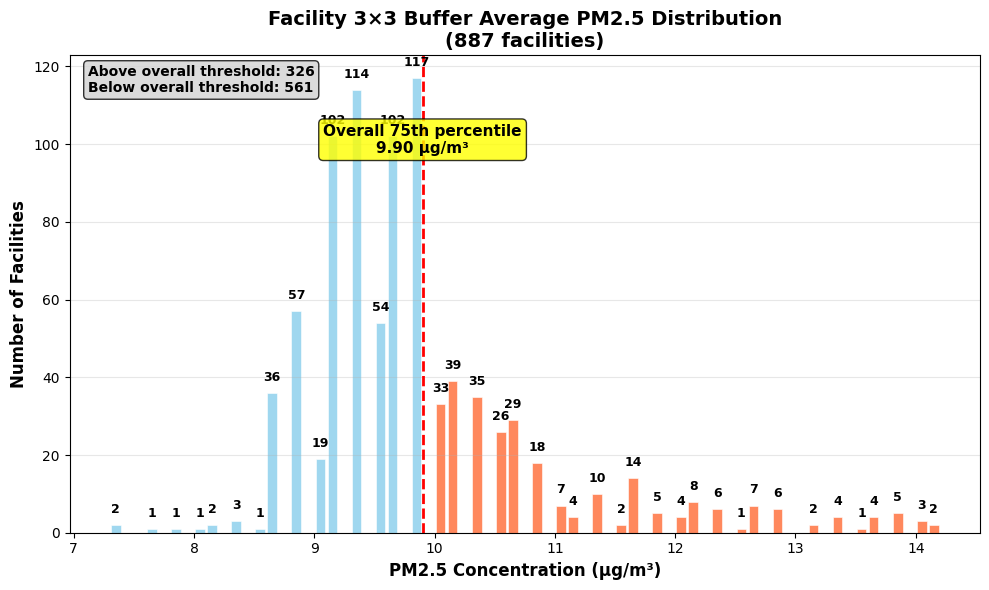

Creating facility PM2.5 distribution plot...
✓ Using overall PM2.5 threshold (75th percentile): 9.90 μg/m³
Calculating PM2.5 for facilities (5×5 buffer)...
✓ Facilities with valid PM2.5: 889
✓ Columns included: ['facility_id', 'plant_name', 'facility_type', 'state', 'pm25', 'sample_count', 'buffer_radius', 'pm_annual_ton']
✓ Facilities above overall threshold: 364
✓ Facilities below overall threshold: 525
✓ Facility PM2.5 distribution plot created
✓ Buffer configuration: 2 (5×5)


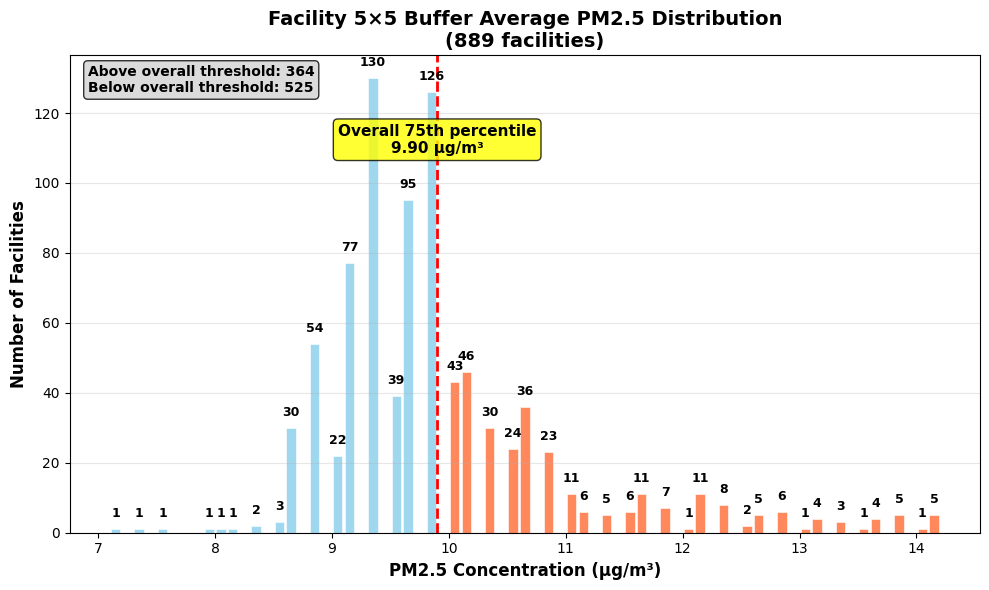

Creating facility type pie chart...
✓ Using overall PM2.5 threshold (75th percentile): 9.90 μg/m³
Calculating PM2.5 for facilities (point location)...
✓ Facilities with valid PM2.5: 885
✓ Columns included: ['facility_id', 'plant_name', 'facility_type', 'state', 'pm25', 'sample_count', 'buffer_radius', 'pm_annual_ton']
✓ Facility type pie chart created
✓ Buffer configuration: 0 (point)
✓ Showing top 7 types + Others (60 facilities)
✓ Facilities above overall threshold breakdown:
   - Compressor Station: 35 facilities (avg PM2.5: 11.26 μg/m³)
   - Airport: 33 facilities (avg PM2.5: 11.28 μg/m³)
   - Chemical Plant: 19 facilities (avg PM2.5: 10.37 μg/m³)
   - Rail Yard: 14 facilities (avg PM2.5: 10.76 μg/m³)
   - Electricity Generation via Combustion: 12 facilities (avg PM2.5: 10.82 μg/m³)
   - Petroleum Refinery: 11 facilities (avg PM2.5: 10.91 μg/m³)
   - Landfill: 8 facilities (avg PM2.5: 11.24 μg/m³)
   - Others: 60 facilities (grouped from 26 types)


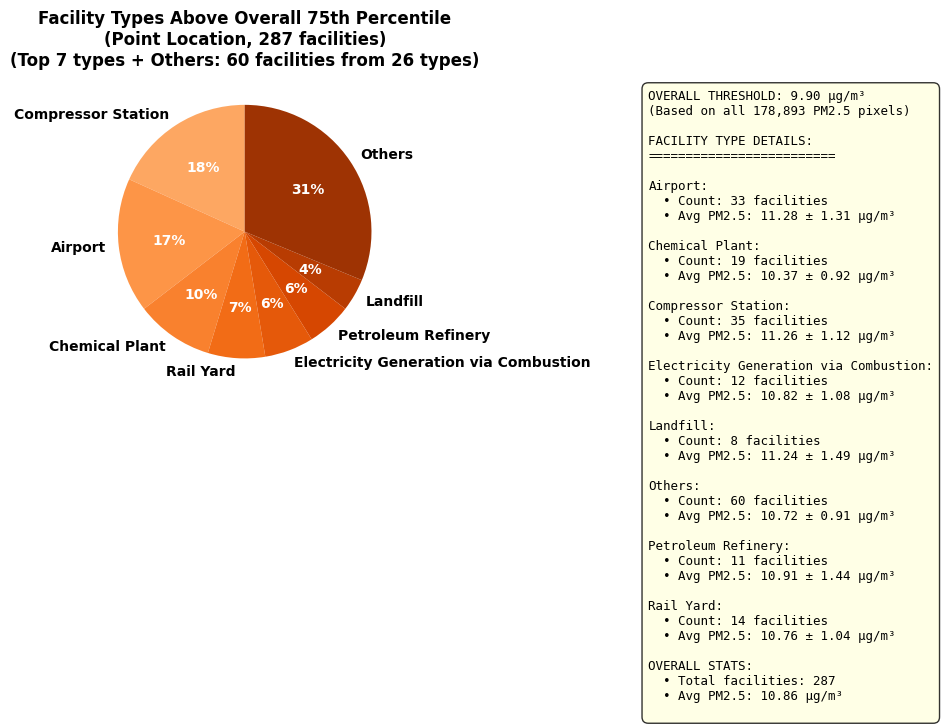

Creating facility type pie chart...
✓ Using overall PM2.5 threshold (75th percentile): 9.90 μg/m³
Calculating PM2.5 for facilities (3×3 buffer)...
✓ Facilities with valid PM2.5: 887
✓ Columns included: ['facility_id', 'plant_name', 'facility_type', 'state', 'pm25', 'sample_count', 'buffer_radius', 'pm_annual_ton']
✓ Facility type pie chart created
✓ Buffer configuration: 1 (3×3)
✓ Showing top 7 types + Others (63 facilities)
✓ Facilities above overall threshold breakdown:
   - Airport: 38 facilities (avg PM2.5: 11.18 μg/m³)
   - Compressor Station: 38 facilities (avg PM2.5: 11.21 μg/m³)
   - Chemical Plant: 26 facilities (avg PM2.5: 10.32 μg/m³)
   - Rail Yard: 19 facilities (avg PM2.5: 10.61 μg/m³)
   - Electricity Generation via Combustion: 14 facilities (avg PM2.5: 10.81 μg/m³)
   - Petroleum Refinery: 11 facilities (avg PM2.5: 11.04 μg/m³)
   - Gas Plant: 9 facilities (avg PM2.5: 11.64 μg/m³)
   - Others: 63 facilities (grouped from 27 types)


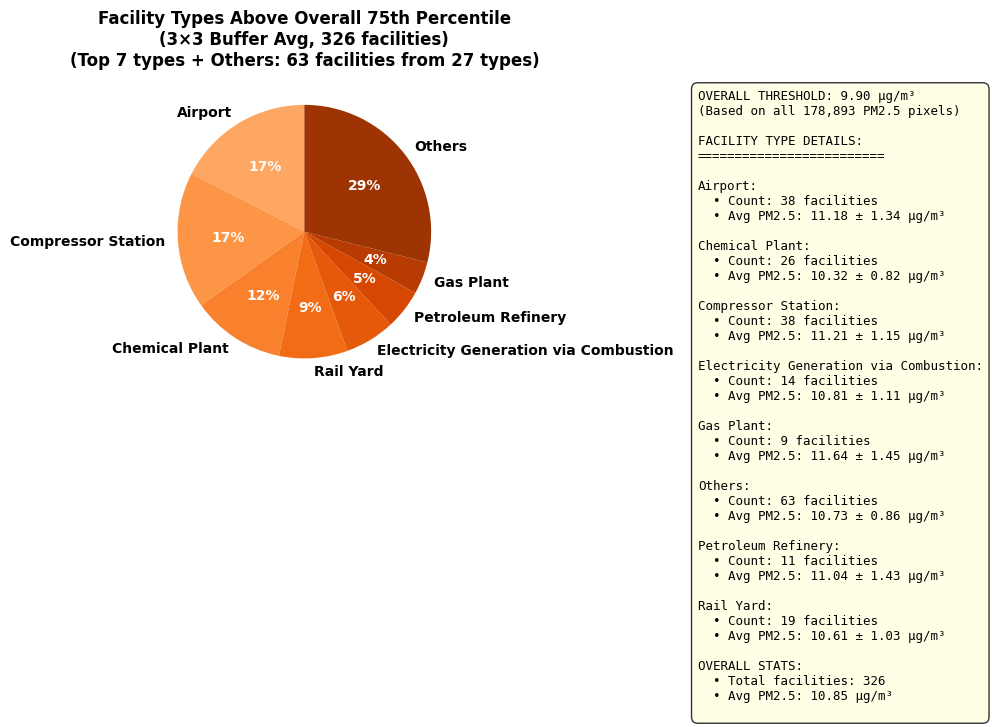

Creating facility type pie chart...
✓ Using overall PM2.5 threshold (0th percentile): 6.20 μg/m³
Calculating PM2.5 for facilities (point location)...
✓ Facilities with valid PM2.5: 885
✓ Columns included: ['facility_id', 'plant_name', 'facility_type', 'state', 'pm25', 'sample_count', 'buffer_radius', 'pm_annual_ton']
✓ Facility type pie chart created
✓ Buffer configuration: 0 (point)
✓ Showing top 7 types + Others (158 facilities)
✓ Facilities above overall threshold breakdown:
   - Compressor Station: 94 facilities (avg PM2.5: 9.98 μg/m³)
   - Airport: 90 facilities (avg PM2.5: 10.01 μg/m³)
   - Chemical Plant: 41 facilities (avg PM2.5: 9.92 μg/m³)
   - Oil or Gas Facility (On-shore): 36 facilities (avg PM2.5: 9.20 μg/m³)
   - Electricity Generation via Combustion: 34 facilities (avg PM2.5: 9.89 μg/m³)
   - Rail Yard: 26 facilities (avg PM2.5: 10.17 μg/m³)
   - Landfill: 23 facilities (avg PM2.5: 9.92 μg/m³)
   - Others: 158 facilities (grouped from 34 types)


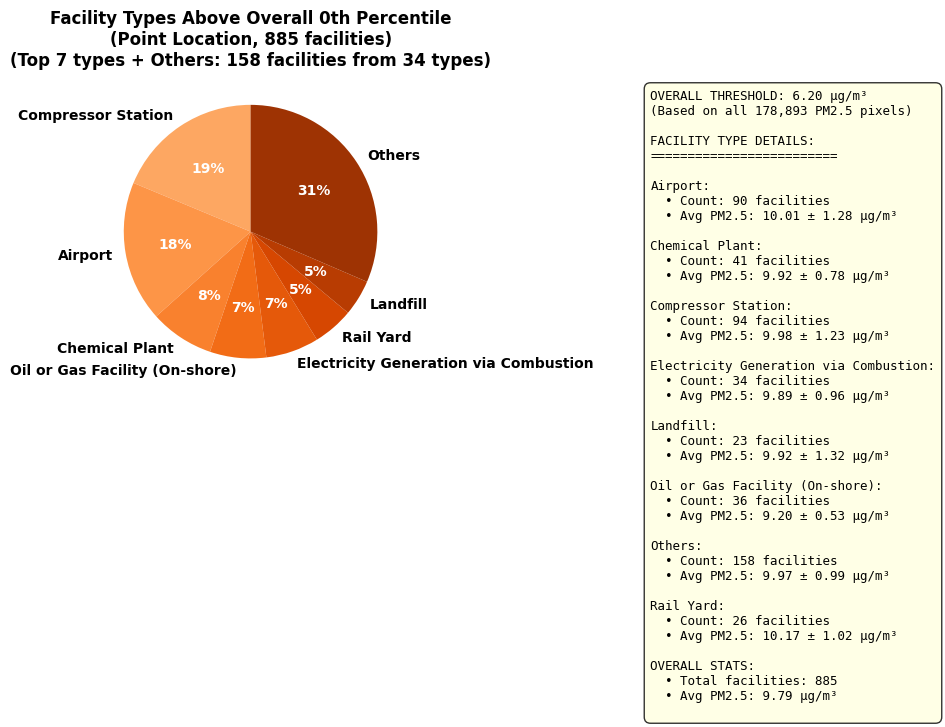

Creating nearest neighbor analysis...
✓ High PM2.5 threshold (95th percentile): 12.10 μg/m³
✓ Found 9,140 high PM2.5 hotspot pixels
✓ Analyzing 896 facilities
Calculating nearest neighbor distances...
  Processed 9,140 / 9,140 hotspots

✓ Nearest neighbor analysis complete!
✓ High PM2.5 hotspots analyzed: 9,140
✓ Distance statistics (km):
   - Mean distance to nearest facility: 7.57
   - Median distance: 7.06
   - 25th percentile: 4.51
   - 75th percentile: 10.14
   - 95th percentile: 14.51
✓ Hotspots within 1km of facilities: 133 (1.5%)


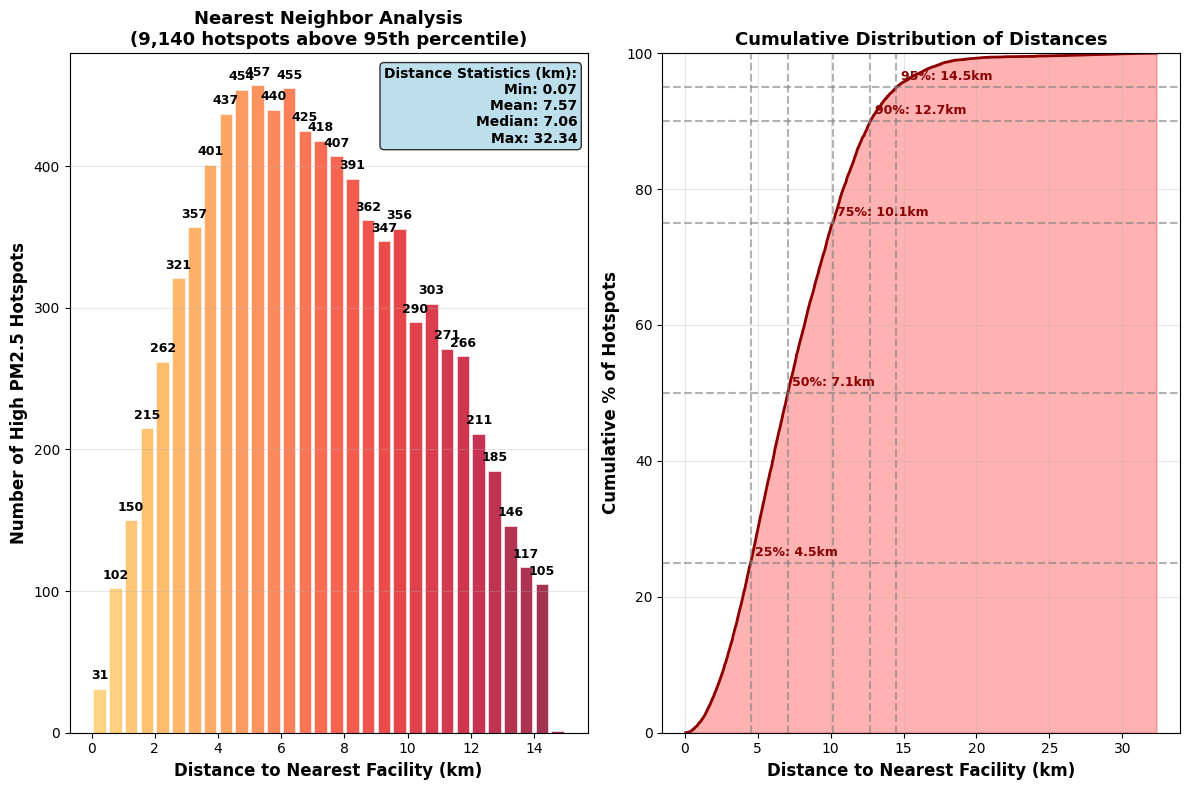

Analysis complete!


In [ ]:
# Initialize analyzer
nei_config = {
    'required': {
        'name': 'site name',
        'facility_type': 'facility source type',
        'state': 'postal abbreviation'
    },
    'optional': {
        'pm_annual_ton': 'total emissions',
        'eis': 'eis facility id'
    }
}
LA_analyzer = PM25FacilityAnalyzer(f'{DATA_PATH}/LA_pm.tif', f'{DATA_PATH}/LAfacility_NEI.geojson', column_config=nei_config)

# 1. Overall PM2.5 distribution (independent)
fig1, overall_threshold = LA_analyzer.plot_overall_pm25_distribution(percentile=95, bin_width=0.1)

# 2. Facility analysis with different buffer configurations
# All use the same overall PM2.5 threshold for consistency

# Point location analysis
fig2, threshold = LA_analyzer.plot_facility_pm25_distribution(buffer_radius=0, percentile=75, bin_width=0.1)
plt.show()

# 3x3 buffer analysis  
fig3, threshold = LA_analyzer.plot_facility_pm25_distribution(buffer_radius=1, percentile=75, bin_width=0.1)
plt.show()

# 5x5 buffer analysis
fig4, threshold = LA_analyzer.plot_facility_pm25_distribution(buffer_radius=2, percentile=75, bin_width=0.1)
plt.show()

# 3. Fuel type pie charts (using overall threshold)

# Point location fuel types
fig5 = LA_analyzer.plot_facility_type_pie_chart(buffer_radius=0, percentile=75)
plt.show()

# 3x3 buffer fuel types
fig6 = LA_analyzer.plot_facility_type_pie_chart(buffer_radius=1, percentile=75)
plt.show()

# 3x3 buffer fuel types
fig7 = LA_analyzer.plot_facility_type_pie_chart(buffer_radius=0, percentile=0)
plt.show()

fig8, distances = LA_analyzer.plot_nearest_neighbor_analysis(percentile=95, bin_width=0.5)
plt.show()

# 4. Compare different configurations
# All plots will use the same overall PM2.5 threshold, making them directly comparable

print("Analysis complete!")

In [ ]:
class PM25RoadAnalyzer:
    """
    Analyzer for PM2.5 and primary road relationships
    """
    
    def __init__(self, pm25_tiff_path, roads_shapefile_path, max_pm25=200):
        """
        Initialize the PM2.5 road analyzer
        
        Parameters:
        pm25_tiff_path : str
            Path to PM2.5 raster file (.tif)
        roads_shapefile_path : str
            Path to primary roads shapefile (.shp)
        max_pm25 : float
            Maximum valid PM2.5 value (values above this are considered invalid)
        """
        print("Loading data...")
        
        # Load PM2.5 raster
        self.pm25_raster = rasterio.open(pm25_tiff_path)
        self.pm25_data = self.pm25_raster.read(1)
        self.pm25_transform = self.pm25_raster.transform

        # Clean PM2.5 data (remove extreme values and NaN)
        cleaned_data = self.pm25_data.copy()
        cleaned_data[(self.pm25_data > max_pm25) | (self.pm25_data <= 0) | np.isnan(self.pm25_data)] = np.nan
        self.pm25_data = cleaned_data
        
        # Get all valid PM2.5 values for overall distribution
        self.all_pm25_values = self.pm25_data[~np.isnan(self.pm25_data)]
        
        # Load roads and reproject to match PM2.5 raster CRS
        print("Loading and reprojecting roads...")
        self.roads = gpd.read_file(roads_shapefile_path)
        if self.roads.crs != self.pm25_raster.crs:
            self.roads = self.roads.to_crs(self.pm25_raster.crs)
        
        print(f"✓ Loaded PM2.5 raster: {self.pm25_data.shape}")
        print(f"✓ Valid PM2.5 pixels: {len(self.all_pm25_values):,}")
        print(f"✓ PM2.5 range: {self.all_pm25_values.min():.1f} - {self.all_pm25_values.max():.1f} μg/m³")
        print(f"✓ Loaded {len(self.roads)} road segments")
        
        # Create road presence mask
        self.road_mask = self._create_road_mask()

    def _create_road_mask(self):
        """
        Create a binary mask where 1 = pixel contains or intersects with roads, 0 = no roads
        
        Returns:
        road_mask : numpy array (same shape as PM2.5 data)
            Binary mask: 1 where road present, 0 otherwise
        """
        print("Creating road presence mask...")
        
        height, width = self.pm25_data.shape
        
        # Get the bounds and transform of the PM2.5 raster
        bounds = self.pm25_raster.bounds
        transform = self.pm25_raster.transform
        
        # Filter roads to only those within PM2.5 raster bounds
        pm25_bbox = gpd.GeoDataFrame(
            [1], 
            geometry=[Polygon.from_bounds(*bounds)], 
            crs=self.pm25_raster.crs
        )
        roads_clipped = gpd.clip(self.roads, pm25_bbox)
        
        print(f"✓ Roads within PM2.5 extent: {len(roads_clipped)}")
        
        if len(roads_clipped) == 0:
            print("❌ No roads found within PM2.5 raster bounds!")
            return np.zeros((height, width), dtype=int)
        
        # Rasterize roads to create binary mask
        # Each road geometry gets value 1
        road_shapes = [(geom, 1) for geom in roads_clipped.geometry if geom is not None]
        
        if not road_shapes:
            print("❌ No valid road geometries found!")
            return np.zeros((height, width), dtype=int)
        
        # Create the rasterized mask
        road_mask = rasterize(
            road_shapes,
            out_shape=(height, width),
            transform=transform,
            fill=0,  # Background value
            default_value=1,  # Road value
            dtype=np.uint8
        )
        
        road_pixels = np.sum(road_mask)
        total_pixels = height * width
        print(f"✓ Road presence mask created")
        print(f"✓ Road pixels: {road_pixels:,} ({road_pixels/total_pixels*100:.2f}%)")
        print(f"✓ Non-road pixels: {total_pixels-road_pixels:,} ({(total_pixels-road_pixels)/total_pixels*100:.2f}%)")
        
        return road_mask

    def create_buffered_road_mask(self, buffer_radius=0):
        """
        Create a binary mask with buffered roads
        
        Parameters:
        buffer_radius : int
            0 = original road pixels only
            1 = 3x3 grid around each road pixel  
            2 = 5x5 grid around each road pixel
            etc.
        
        Returns:
        buffered_mask : numpy array (same shape as PM2.5 data)
            Binary mask: 1 where road or buffer present, 0 otherwise
        """
        if buffer_radius == 0:
            return self.road_mask.copy()
        
        print(f"Creating buffered road mask (buffer_radius={buffer_radius})...")
        
        height, width = self.pm25_data.shape
        buffered_mask = np.zeros((height, width), dtype=int)
        
        # Find all road pixels
        road_pixels = np.where(self.road_mask == 1)
        
        for row, col in zip(road_pixels[0], road_pixels[1]):
            # Buffer area around road pixel
            for dr in range(-buffer_radius, buffer_radius + 1):
                for dc in range(-buffer_radius, buffer_radius + 1):
                    r = row + dr
                    c = col + dc
                    if 0 <= r < height and 0 <= c < width:
                        buffered_mask[r, c] = 1
        
        buffered_pixels = np.sum(buffered_mask)
        total_pixels = height * width
        print(f"✓ Buffered road mask created")
        print(f"✓ Buffered road pixels: {buffered_pixels:,} ({buffered_pixels/total_pixels*100:.2f}%)")
        
        return buffered_mask

    def haversine_distance(self, lon1, lat1, lon2, lat2):
        """
        Calculate haversine distance between two points in kilometers
        """
        R = 6371  # Earth's radius in km
        
        # Convert to radians
        lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
        
        # Haversine formula
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
        c = 2 * np.arcsin(np.sqrt(a))
        
        return R * c

    def analyze_pixel_correlation(self, buffer_radius=0, sample_size=None, random_seed=42):
        """
        Analyze correlation between PM2.5 concentration (continuous) and road presence (binary)
        at the pixel level with configurable buffer radius.
        
        Parameters:
        buffer_radius : int
            Buffer radius around roads (0 = road pixels only, 1 = 3x3, 2 = 5x5, etc.)
        sample_size : int, optional
            Number of pixels to sample for analysis (default: all valid pixels)
        random_seed : int
            Random seed for reproducible sampling
        
        Returns:
        dict: Statistical results including correlation and t-test
        """
        print(f"\n{'='*60}")
        print(f"PIXEL-LEVEL ROAD CORRELATION ANALYSIS")
        print(f"Buffer radius: {buffer_radius} ({'original' if buffer_radius == 0 else f'{2*buffer_radius+1}x{2*buffer_radius+1} grid'})")
        print(f"{'='*60}")
        
        np.random.seed(random_seed)
        
        # Step 1: Create buffered road mask
        road_mask = self.create_buffered_road_mask(buffer_radius=buffer_radius)
        
        # Step 2: Get valid PM2.5 pixels (remove NaN values)
        valid_pm_mask = ~np.isnan(self.pm25_data)
        
        # Step 3: Combine masks to get analyzable pixels
        analyzable_mask = valid_pm_mask
        pm25_values = self.pm25_data[analyzable_mask]
        road_presence = road_mask[analyzable_mask]
        
        print(f"\n📊 DATA PREPARATION:")
        print(f"   • Total pixels: {self.pm25_data.size:,}")
        print(f"   • Valid PM2.5 pixels: {np.sum(valid_pm_mask):,}")
        print(f"   • Analyzable pixels: {len(pm25_values):,}")
        
        # Step 4: Sample if requested
        if sample_size is not None and sample_size < len(pm25_values):
            sample_indices = np.random.choice(len(pm25_values), size=sample_size, replace=False)
            pm25_values = pm25_values[sample_indices]
            road_presence = road_presence[sample_indices]
            print(f"   • Sampled pixels for analysis: {len(pm25_values):,}")
        
        # Step 5: Separate road vs non-road pixels
        road_pixels = pm25_values[road_presence == 1]
        non_road_pixels = pm25_values[road_presence == 0]
        
        print(f"\n🛣️ ROAD PRESENCE BREAKDOWN:")
        print(f"   • Pixels with roads: {len(road_pixels):,}")
        print(f"   • Pixels without roads: {len(non_road_pixels):,}")
        
        if len(road_pixels) == 0:
            print("❌ ERROR: No road pixels found. Cannot perform analysis.")
            return None
        
        if len(non_road_pixels) == 0:
            print("❌ ERROR: No non-road pixels found. Cannot perform analysis.")
            return None
        
        # Step 6: Calculate descriptive statistics
        road_stats = {
            'mean': np.mean(road_pixels),
            'std': np.std(road_pixels),
            'median': np.median(road_pixels),
            'min': np.min(road_pixels),
            'max': np.max(road_pixels)
        }
        
        non_road_stats = {
            'mean': np.mean(non_road_pixels),
            'std': np.std(non_road_pixels),
            'median': np.median(non_road_pixels),
            'min': np.min(non_road_pixels),
            'max': np.max(non_road_pixels)
        }
        
        print(f"\n📈 DESCRIPTIVE STATISTICS:")
        print(f"   Road pixels PM2.5 (μg/m³):")
        print(f"      Mean: {road_stats['mean']:.2f} ± {road_stats['std']:.2f}")
        print(f"      Median: {road_stats['median']:.2f}")
        print(f"      Range: {road_stats['min']:.2f} - {road_stats['max']:.2f}")
        print(f"   Non-road pixels PM2.5 (μg/m³):")
        print(f"      Mean: {non_road_stats['mean']:.2f} ± {non_road_stats['std']:.2f}")
        print(f"      Median: {non_road_stats['median']:.2f}")
        print(f"      Range: {non_road_stats['min']:.2f} - {non_road_stats['max']:.2f}")
        
        # Step 7: Point-biserial correlation
        correlation_coef, correlation_p = stats.pointbiserialr(road_presence, pm25_values)
        
        # Step 8: Independent samples t-test (Welch's t-test)
        t_statistic, t_p_value = stats.ttest_ind(road_pixels, non_road_pixels, equal_var=False)
        
        # Step 9: Effect size (Cohen's d)
        pooled_std = np.sqrt(((len(road_pixels) - 1) * road_stats['std']**2 + 
                            (len(non_road_pixels) - 1) * non_road_stats['std']**2) / 
                            (len(road_pixels) + len(non_road_pixels) - 2))
        cohens_d = (road_stats['mean'] - non_road_stats['mean']) / pooled_std
        
        # Step 10: Additional tests
        # Mann-Whitney U test (non-parametric alternative)
        u_statistic, u_p_value = stats.mannwhitneyu(road_pixels, non_road_pixels, 
                                                    alternative='two-sided')
        
        # Levene's test for equal variances
        levene_stat, levene_p = stats.levene(road_pixels, non_road_pixels)
        
        # Step 11: Compile results
        results = {
            'buffer_radius': buffer_radius,
            'sample_info': {
                'total_pixels': len(pm25_values),
                'road_pixels': len(road_pixels),
                'non_road_pixels': len(non_road_pixels)
            },
            'descriptive_stats': {
                'road': road_stats,
                'non_road': non_road_stats
            },
            'correlation': {
                'point_biserial_r': correlation_coef,
                'p_value': correlation_p
            },
            't_test': {
                't_statistic': t_statistic,
                'p_value': t_p_value,
                'cohens_d': cohens_d
            },
            'mann_whitney': {
                'u_statistic': u_statistic,
                'p_value': u_p_value
            },
            'levene_test': {
                'statistic': levene_stat,
                'p_value': levene_p
            },
            'raw_data': {
                'pm25_values': pm25_values,
                'road_presence': road_presence
            }
        }
        
        # Step 12: Print results
        print(f"\n🔍 STATISTICAL ANALYSIS RESULTS:")
        print(f"   Point-biserial correlation:")
        print(f"      r = {correlation_coef:.4f}")
        print(f"      p-value = {correlation_p:.6f}")
        
        print(f"   Independent samples t-test:")
        print(f"      t-statistic = {t_statistic:.4f}")
        print(f"      p-value = {t_p_value:.6f}")
        print(f"      Cohen's d = {cohens_d:.4f}")
        
        print(f"   Mann-Whitney U test:")
        print(f"      U-statistic = {u_statistic:.0f}")
        print(f"      p-value = {u_p_value:.6f}")
        
        print(f"   Levene's test (equal variances):")
        print(f"      Statistic = {levene_stat:.4f}")
        print(f"      p-value = {levene_p:.6f}")
        
        # Step 13: Interpretation
        print(f"\n💡 INTERPRETATION:")
        
        # Correlation interpretation
        if abs(correlation_coef) < 0.1:
            corr_strength = "negligible"
        elif abs(correlation_coef) < 0.3:
            corr_strength = "small"
        elif abs(correlation_coef) < 0.5:
            corr_strength = "medium"
        else:
            corr_strength = "large"
        
        corr_direction = "positive" if correlation_coef > 0 else "negative"
        
        print(f"   • Correlation: {corr_strength} {corr_direction} correlation")
        if correlation_p < 0.05:
            print(f"   • The correlation is statistically significant (p < 0.05)")
        else:
            print(f"   • The correlation is not statistically significant (p >= 0.05)")
        
        # Effect size interpretation
        if abs(cohens_d) < 0.2:
            effect_size = "small"
        elif abs(cohens_d) < 0.5:
            effect_size = "medium"
        elif abs(cohens_d) < 0.8:
            effect_size = "large"
        else:
            effect_size = "very large"
        
        print(f"   • Effect size: {effect_size} (Cohen's d = {cohens_d:.3f})")
        
        # T-test interpretation
        if t_p_value < 0.05:
            print(f"   • There IS a statistically significant difference in PM2.5 between road and non-road pixels")
            if road_stats['mean'] > non_road_stats['mean']:
                print(f"   • Road pixels have significantly HIGHER PM2.5 concentrations")
            else:
                print(f"   • Road pixels have significantly LOWER PM2.5 concentrations")
        else:
            print(f"   • There is NO statistically significant difference in PM2.5 between groups")
        
        # Variance equality
        if levene_p < 0.05:
            print(f"   • The groups have significantly different variances (heteroscedastic)")
        else:
            print(f"   • The groups have similar variances (homoscedastic)")
        
        print(f"\n{'='*60}")
        
        return results

    def plot_correlation_analysis(self, results, figsize=(16, 12), 
                                road_dist='beta', road_params=(3, 2),
                                non_road_dist='norm', non_road_params=None,
                                include_nearest_neighbor=True, nn_percentile=95, nn_bin_width=0.5):
        """
        Create comprehensive visualization of road correlation analysis results
        
        Parameters:
        results : dict
            Results from analyze_pixel_correlation
        figsize : tuple
            Figure size
        road_dist : str
            Distribution for road pixels Q-Q plot ('norm', 'beta', 'lognorm', 'uniform', etc.)
        road_params : tuple
            Parameters for road distribution (e.g., (3, 2) for beta(3,2))
        non_road_dist : str
            Distribution for non-road pixels Q-Q plot
        non_road_params : tuple
            Parameters for non-road distribution
        include_nearest_neighbor : bool
            Whether to include nearest neighbor analysis in plots 4 & 5
        nn_percentile : float
            Percentile for defining PM2.5 hotspots in nearest neighbor analysis
        nn_bin_width : float
            Bin width for nearest neighbor distance histogram
        """
        if results is None:
            print("No results to plot")
            return None
        
        from scipy import stats as scipy_stats
        
        # Extract data
        pm25_values = results['raw_data']['pm25_values']
        road_presence = results['raw_data']['road_presence']
        road_pixels = pm25_values[road_presence == 1]
        non_road_pixels = pm25_values[road_presence == 0]
        
        # Create figure
        fig, axes = plt.subplots(2, 3, figsize=figsize)
        fig.suptitle(f'Satellite PM2.5 and Road Correlation Analysis\nBuffer Radius: {results["buffer_radius"]} pixels'
                    if results["buffer_radius"] > 0 else '(original road pixels)',
                    fontsize=16, fontweight='bold')
        
        # Plot 1: Box plot comparison
        ax1 = axes[0, 0]
        ax1.text(-0.1, 1.05, 'A)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
        box_data = [non_road_pixels, road_pixels]
        box_labels = ['No Road', 'Road']
        
        bp = ax1.boxplot(box_data, labels=box_labels, patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        bp['boxes'][1].set_facecolor('orange')
        
        ax1.set_ylabel('PM2.5 Concentration (μg/m³)')
        ax1.set_title('PM2.5 Distribution by Road Presence')
        ax1.grid(True, alpha=0.3)
        
        # Add statistical annotation
        mean_diff = results['descriptive_stats']['road']['mean'] - results['descriptive_stats']['non_road']['mean']
        ax1.text(0.5, 0.95, f"Mean difference: {mean_diff:.2f} μg/m³\nt = {results['t_test']['t_statistic']:.3f}, p = {results['t_test']['p_value']:.4f}",
                transform=ax1.transAxes, ha='center', va='top',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))
        
        # Plot 2: Histograms with distribution curves
        ax2 = axes[0, 1]
        ax2.text(-0.1, 1.05, 'B)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
        bins = np.linspace(min(pm25_values), max(pm25_values), 50)
        
        ax2.hist(non_road_pixels, bins=bins, alpha=0.7, label='No Road', color='lightblue', density=True)
        ax2.hist(road_pixels, bins=bins, alpha=0.7, label='Road', color='orange', density=True)
        
        # Add distribution curves
        x_range = np.linspace(min(pm25_values), max(pm25_values), 200)
        
        # Non-road distribution curve
        try:
            if non_road_dist == 'beta' and non_road_params:
                # Scale to [0,1] for beta, then scale back
                nr_scaled = (non_road_pixels - non_road_pixels.min()) / (non_road_pixels.max() - non_road_pixels.min() + 1e-8)
                x_scaled = np.linspace(0, 1, 200)
                y_beta = scipy_stats.beta.pdf(x_scaled, non_road_params[0], non_road_params[1])
                # Scale back to original range
                x_orig = x_scaled * (non_road_pixels.max() - non_road_pixels.min()) + non_road_pixels.min()
                y_scaled = y_beta / (non_road_pixels.max() - non_road_pixels.min())
                ax2.plot(x_orig, y_scaled, 'blue', linewidth=2, label=f'Non-road β({non_road_params[0]},{non_road_params[1]})')
            elif non_road_dist == 'norm':
                mean_nr = results['descriptive_stats']['non_road']['mean']
                std_nr = results['descriptive_stats']['non_road']['std']
                y_norm = scipy_stats.norm.pdf(x_range, mean_nr, std_nr)
                ax2.plot(x_range, y_norm, 'blue', linewidth=2, label='Non-road Normal')
            elif non_road_params:
                dist_obj = getattr(scipy_stats, non_road_dist)
                y_dist = dist_obj.pdf(x_range, *non_road_params)
                ax2.plot(x_range, y_dist, 'blue', linewidth=2, label=f'Non-road {non_road_dist}')
        except Exception as e:
            print(f"Could not plot non-road distribution curve: {e}")
        
        # Road distribution curve  
        try:
            if road_dist == 'beta' and road_params:
                # Scale to [0,1] for beta, then scale back
                r_scaled = (road_pixels - road_pixels.min()) / (road_pixels.max() - road_pixels.min() + 1e-8)
                x_scaled = np.linspace(0, 1, 200)
                y_beta = scipy_stats.beta.pdf(x_scaled, road_params[0], road_params[1])
                # Scale back to original range
                x_orig = x_scaled * (road_pixels.max() - road_pixels.min()) + road_pixels.min()
                y_scaled = y_beta / (road_pixels.max() - road_pixels.min())
                ax2.plot(x_orig, y_scaled, 'red', linewidth=2, label=f'Road β({road_params[0]},{road_params[1]})')
            elif road_dist == 'norm':
                mean_r = results['descriptive_stats']['road']['mean']
                std_r = results['descriptive_stats']['road']['std']
                y_norm = scipy_stats.norm.pdf(x_range, mean_r, std_r)
                ax2.plot(x_range, y_norm, 'red', linewidth=2, label='Road Normal')
            elif road_params:
                dist_obj = getattr(scipy_stats, road_dist)
                y_dist = dist_obj.pdf(x_range, *road_params)
                ax2.plot(x_range, y_dist, 'red', linewidth=2, label=f'Road {road_dist}')
        except Exception as e:
            print(f"Could not plot road distribution curve: {e}")
        
        ax2.set_xlabel('PM2.5 Concentration (μg/m³)')
        ax2.set_ylabel('Density')
        ax2.set_title('PM2.5 Distribution Comparison with Fitted Curves')
        ax2.legend(fontsize=8)
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Scatter plot with correlation
        ax3 = axes[0, 2]
        ax3.text(-0.1, 1.05, 'C)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
        
        # Add some jitter to binary variable for better visualization
        jittered_road = road_presence + np.random.normal(0, 0.05, len(road_presence))
        
        ax3.scatter(jittered_road, pm25_values, alpha=0.3, s=1)
        
        # Add correlation line
        z = np.polyfit(road_presence, pm25_values, 1)
        p = np.poly1d(z)
        ax3.plot([0, 1], p([0, 1]), "r--", alpha=0.8, linewidth=2)
        
        ax3.set_xlim(-0.2, 1.2)
        ax3.set_xlabel('Road Presence (0=No, 1=Yes)')
        ax3.set_ylabel('PM2.5 Concentration (μg/m³)')
        ax3.set_title('Point-Biserial Correlation')
        ax3.set_xticks([0, 1])
        ax3.set_xticklabels(['No Road', 'Road'])
        ax3.grid(True, alpha=0.3)
        
        # Add correlation text
        ax3.text(0.05, 0.95, f"r = {results['correlation']['point_biserial_r']:.4f}\np = {results['correlation']['p_value']:.4f}",
                transform=ax3.transAxes, va='top',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))
        
        # Plot 4: Nearest Neighbor Distance Histogram
        ax4 = axes[1, 0]
        ax4.text(-0.1, 1.05, 'D)', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
        
        if include_nearest_neighbor:
            try:
                print("Running nearest neighbor analysis for correlation plot...")
                # Run the existing nearest neighbor analysis
                _, nearest_distances = self.plot_nearest_neighbor_analysis(
                    percentile=nn_percentile, 
                    bin_width=nn_bin_width, 
                    figsize=(1, 1)  # Small figure since we only want the data
                )
                plt.close()  # Close the temporary figure
                
                if nearest_distances is not None:
                    # Create histogram of distances
                    max_distance = np.percentile(nearest_distances, 95)  # Use 95th percentile to avoid outliers
                    bins = np.arange(0, max_distance + nn_bin_width, nn_bin_width)
                    
                    counts, _ = np.histogram(nearest_distances[nearest_distances <= max_distance], bins=bins)
                    bin_centers = (bins[:-1] + bins[1:]) / 2
                    
                    # Create gradient colors (closer = warmer colors)
                    colors = plt.cm.YlOrRd(np.linspace(0.3, 1.0, len(bin_centers)))
                    
                    bars = ax4.bar(bin_centers, counts, width=nn_bin_width*0.8, color=colors, 
                                alpha=0.8, edgecolor='white', linewidth=0.5)
                    
                    # Add count labels on significant bars
                    for bar, count in zip(bars, counts):
                        if count > max(counts) * 0.05:  # Only label bars with >5% of max count
                            height = bar.get_height()
                            ax4.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.02,
                                f'{count}', ha='center', va='bottom', fontsize=8)
                    
                    ax4.set_xlabel('Distance to Nearest Road (km)')
                    ax4.set_ylabel('Number of High PM2.5 Hotspots')
                    ax4.set_title(f'Nearest Neighbor Analysis\n({len(nearest_distances):,} hotspots above {nn_percentile}th percentile)')
                    ax4.grid(True, alpha=0.3, axis='y')
                    
                    # Add statistics text
                    stats_text = f"Distance Stats (km):\nMean: {nearest_distances.mean():.2f}\nMedian: {np.median(nearest_distances):.2f}"
                    ax4.text(0.95, 0.95, stats_text, transform=ax4.transAxes, va='top', ha='right',
                            fontsize=9, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))
                    
                    # Store distances in results for plot 5
                    results['nearest_distances'] = nearest_distances
                else:
                    raise Exception("No distances returned")
                    
            except Exception as e:
                ax4.text(0.5, 0.5, f'Nearest neighbor analysis failed:\n{str(e)[:100]}...', 
                        ha='center', va='center', transform=ax4.transAxes, fontsize=10,
                        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcoral", alpha=0.8))
                ax4.set_title('Nearest Neighbor Analysis (Failed)')
        else:
            ax4.text(0.5, 0.5, 'Nearest neighbor analysis\nnot included\n\nSet include_nearest_neighbor=True', 
                    ha='center', va='center', transform=ax4.transAxes, fontsize=11,
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
            ax4.set_title('Nearest Neighbor Analysis (Disabled)')
        
        # Plot 5: Nearest Neighbor Cumulative Distribution
        ax5 = axes[1, 1]
        ax5.text(-0.1, 1.05, 'E)', transform=ax5.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
        
        if include_nearest_neighbor and 'nearest_distances' in results:
            distances = results['nearest_distances']
            
            # Create cumulative distribution
            sorted_distances = np.sort(distances)
            cumulative_pct = np.arange(1, len(sorted_distances) + 1) / len(sorted_distances) * 100
            
            ax5.plot(sorted_distances, cumulative_pct, linewidth=2, color='darkred')
            ax5.fill_between(sorted_distances, cumulative_pct, alpha=0.3, color='red')
            
            ax5.set_xlabel('Distance to Nearest Road (km)')
            ax5.set_ylabel('Cumulative % of Hotspots')
            ax5.set_title('Cumulative Distribution\nof Distances')
            ax5.grid(True, alpha=0.3)
            ax5.set_ylim(0, 100)
            
            # Add percentile annotations
            percentiles_to_show = [25, 50, 75, 90]
            for pct in percentiles_to_show:
                distance_at_pct = np.percentile(distances, pct)
                ax5.axhline(y=pct, color='gray', linestyle='--', alpha=0.6)
                ax5.axvline(x=distance_at_pct, color='gray', linestyle='--', alpha=0.6)
                ax5.text(distance_at_pct + max(sorted_distances)*0.01, pct + 2, 
                        f'{pct}%: {distance_at_pct:.1f}km', fontsize=8, color='darkred', fontweight='bold')
            
            # Identify concerning areas (hotspots very close to roads)
            very_close = distances < 1.0  # Within 1km
            if np.sum(very_close) > 0:
                close_pct = np.sum(very_close)/len(distances)*100
                ax5.text(0.02, 0.98, f"Within 1km:\n{np.sum(very_close):,} hotspots\n({close_pct:.1f}%)", 
                        transform=ax5.transAxes, va='top', ha='left', fontsize=9,
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="orange", alpha=0.8))
        else:
            ax5.text(0.5, 0.5, 'Nearest neighbor analysis\nnot included or failed\n\nCheck plot 4 status', 
                    ha='center', va='center', transform=ax5.transAxes, fontsize=11,
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
            ax5.set_title('Cumulative Distribution (N/A)')
        
        # Plot 6: Summary statistics table
        ax6 = axes[1, 2]
        ax6.text(-0.1, 1.05, 'F)', transform=ax6.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
        ax6.axis('off')
        
        # Create summary table
        summary_data = [
            ['Metric', 'Road Pixels', 'Non-Road Pixels'],
            ['Count', f"{len(road_pixels):,}", f"{len(non_road_pixels):,}"],
            ['Mean ± SD', f"{results['descriptive_stats']['road']['mean']:.2f} ± {results['descriptive_stats']['road']['std']:.2f}",
            f"{results['descriptive_stats']['non_road']['mean']:.2f} ± {results['descriptive_stats']['non_road']['std']:.2f}"],
            ['Median', f"{results['descriptive_stats']['road']['median']:.2f}",
            f"{results['descriptive_stats']['non_road']['median']:.2f}"],
            ['Range', f"{results['descriptive_stats']['road']['min']:.2f} - {results['descriptive_stats']['road']['max']:.2f}",
            f"{results['descriptive_stats']['non_road']['min']:.2f} - {results['descriptive_stats']['non_road']['max']:.2f}"],
            ['', '', ''],
            ['Distribution Tests', 'Assumption', 'Parameters'],
            [f'Road Q-Q', f'{road_dist.title()}', f'{road_params}' if road_params else 'Default'],
            [f'Non-road Q-Q', f'{non_road_dist.title()}', f'{non_road_params}' if non_road_params else 'Default'],
            ['', '', ''],
            ['Statistical Tests', 'Value', 'p-value'],
            ['Point-biserial r', f"{results['correlation']['point_biserial_r']:.4f}", f"{results['correlation']['p_value']:.4f}"],
            ['t-test statistic', f"{results['t_test']['t_statistic']:.4f}", f"{results['t_test']['p_value']:.4f}"],
            ['Cohen\'s d', f"{results['t_test']['cohens_d']:.4f}", ''],
            ['Mann-Whitney U', f"{results['mann_whitney']['u_statistic']:.0f}", f"{results['mann_whitney']['p_value']:.4f}"],
            ['Levene test', f"{results['levene_test']['statistic']:.4f}", f"{results['levene_test']['p_value']:.4f}"]
        ]
        
        # Create table
        table = ax6.table(cellText=summary_data[1:], colLabels=summary_data[0],
                        cellLoc='center', loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(8)
        table.scale(1, 1.2)
        
        # Style the table
        for i in range(len(summary_data)):
            for j in range(3):
                cell = table[(i, j)]
                if i == 0:  # Header
                    cell.set_facecolor('#40466e')
                    cell.set_text_props(weight='bold', color='white')
                elif i in [6, 10]:  # Sub-headers
                    cell.set_facecolor('#d4d4d4')
                    cell.set_text_props(weight='bold')
                else:
                    cell.set_facecolor('#f0f0f0')
        
        ax6.set_title('Summary Statistics & Distribution Tests')
        
        plt.tight_layout()
        return fig

    def plot_nearest_neighbor_analysis(self, percentile=95, bin_width=0.5, figsize=(12, 8)):
        """
        Nearest neighbor analysis: For each high PM2.5 hotspot, plot distance to nearest road
        
        Parameters:
        percentile : float
            Percentile to define high PM2.5 hotspots
        bin_width : float
            Width of distance bins in km
        """
        print(f"Creating nearest neighbor analysis...")
        
        # Get high PM2.5 hotspots (using overall threshold)
        overall_threshold = np.percentile(self.all_pm25_values, percentile)
        print(f"✓ High PM2.5 threshold ({percentile}th percentile): {overall_threshold:.2f} μg/m³")
        
        # Find high PM2.5 hotspot locations
        height, width = self.pm25_data.shape
        hotspot_coords = []
        hotspot_values = []
        
        for row in range(height):
            for col in range(width):
                pm25_val = self.pm25_data[row, col]
                if not np.isnan(pm25_val) and pm25_val >= overall_threshold:
                    x, y = rasterio.transform.xy(self.pm25_transform, row, col)
                    hotspot_coords.append((x, y))
                    hotspot_values.append(pm25_val)
        
        hotspot_coords = np.array(hotspot_coords)
        hotspot_values = np.array(hotspot_values)
        
        print(f"✓ Found {len(hotspot_coords):,} high PM2.5 hotspot pixels")
        
        if len(hotspot_coords) == 0:
            print("No high PM2.5 hotspots found!")
            return None, None
        
        # Get road coordinates by extracting points from road geometries
        print("Extracting road coordinates...")
        road_coords = []
        for idx, road in self.roads.iterrows():
            if road.geometry is not None:
                if hasattr(road.geometry, 'coords'):
                    # LineString
                    for coord in road.geometry.coords:
                        road_coords.append(coord)
                elif hasattr(road.geometry, 'geoms'):
                    # MultiLineString
                    for geom in road.geometry.geoms:
                        for coord in geom.coords:
                            road_coords.append(coord)
        
        road_coords = np.array(road_coords)
        print(f"✓ Extracted {len(road_coords):,} road coordinate points")
        
        if len(road_coords) == 0:
            print("No road coordinates found!")
            return None, None
        
        # Calculate distance from each hotspot to nearest road point
        print("Calculating nearest neighbor distances...")
        nearest_distances = []
        
        # Process in batches to avoid memory issues
        batch_size = 1000
        for i in range(0, len(hotspot_coords), batch_size):
            batch_end = min(i + batch_size, len(hotspot_coords))
            batch_hotspots = hotspot_coords[i:batch_end]
            
            batch_distances = []
            for hotspot_coord in batch_hotspots:
                # Calculate haversine distances in km
                distances = self.haversine_distance(
                    road_coords[:, 0], road_coords[:, 1],  # road lon, lat
                    hotspot_coord[0], hotspot_coord[1]     # hotspot lon, lat
                )
                nearest_distance = np.min(distances)  # Distance to nearest road point
                batch_distances.append(nearest_distance)
            
            nearest_distances.extend(batch_distances)
            
            if batch_end % 5000 == 0 or batch_end == len(hotspot_coords):
                print(f"  Processed {batch_end:,} / {len(hotspot_coords):,} hotspots")
        
        nearest_distances = np.array(nearest_distances)
        
        # Create the plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        
        # Plot 1: Histogram of distances
        # Create bins
        max_distance = np.percentile(nearest_distances, 95)  # Use 95th percentile to avoid outliers
        n_bins = int(np.ceil(max_distance / bin_width))
        bins = np.arange(0, max_distance + bin_width, bin_width)
        
        counts, _ = np.histogram(nearest_distances[nearest_distances <= max_distance], bins=bins)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        
        # Create gradient colors (closer = more concerning = warmer colors)
        colors = plt.cm.YlOrRd(np.linspace(0.3, 1.0, len(bin_centers)))
        
        bars = ax1.bar(bin_centers, counts, width=bin_width*0.8, color=colors, 
                      alpha=0.8, edgecolor='white', linewidth=0.5)
        
        # Add count labels on significant bars
        for bar, count in zip(bars, counts):
            if count > max(counts) * 0.05:  # Only label bars with >5% of max count
                height = bar.get_height()
                ax1.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
                       f'{count:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        ax1.set_xlabel('Distance to Nearest Road (km)', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Number of High PM2.5 Hotspots', fontsize=12, fontweight='bold')
        ax1.set_title(f'Nearest Neighbor Analysis\n({len(hotspot_coords):,} hotspots above {percentile}th percentile)', 
                     fontsize=13, fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='y')
        
        # Add statistics text
        stats_text = f"Distance Statistics (km):\n"
        stats_text += f"Min: {nearest_distances.min():.2f}\n"
        stats_text += f"Mean: {nearest_distances.mean():.2f}\n"
        stats_text += f"Median: {np.median(nearest_distances):.2f}\n"
        stats_text += f"Max: {nearest_distances.max():.2f}"
        
        ax1.text(0.98, 0.98, stats_text, transform=ax1.transAxes, va='top', ha='right',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))
        
        # Plot 2: Cumulative distribution
        sorted_distances = np.sort(nearest_distances)
        cumulative_pct = np.arange(1, len(sorted_distances) + 1) / len(sorted_distances) * 100
        
        ax2.plot(sorted_distances, cumulative_pct, linewidth=2, color='darkred')
        ax2.fill_between(sorted_distances, cumulative_pct, alpha=0.3, color='red')
        
        ax2.set_xlabel('Distance to Nearest Road (km)', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Cumulative % of Hotspots', fontsize=12, fontweight='bold')
        ax2.set_title('Cumulative Distribution of Distances', fontsize=13, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        ax2.set_ylim(0, 100)
        
        # Add percentile annotations
        percentiles_to_show = [25, 50, 75, 90, 95]
        for pct in percentiles_to_show:
            distance_at_pct = np.percentile(nearest_distances, pct)
            ax2.axhline(y=pct, color='gray', linestyle='--', alpha=0.6)
            ax2.axvline(x=distance_at_pct, color='gray', linestyle='--', alpha=0.6)
            ax2.text(distance_at_pct + max(sorted_distances)*0.01, pct + 1, 
                    f'{pct}%: {distance_at_pct:.1f}km', fontsize=9, color='darkred', fontweight='bold')
        
        plt.tight_layout()
        
        # Print summary
        print(f"\n✓ Nearest neighbor analysis complete!")
        print(f"✓ High PM2.5 hotspots analyzed: {len(hotspot_coords):,}")
        print(f"✓ Distance statistics (km):")
        print(f"   - Mean distance to nearest road: {nearest_distances.mean():.2f}")
        print(f"   - Median distance: {np.median(nearest_distances):.2f}")
        print(f"   - 25th percentile: {np.percentile(nearest_distances, 25):.2f}")
        print(f"   - 75th percentile: {np.percentile(nearest_distances, 75):.2f}")
        print(f"   - 95th percentile: {np.percentile(nearest_distances, 95):.2f}")
        
        # Identify concerning areas (hotspots very close to roads)
        very_close = nearest_distances < 1.0  # Within 1km
        if np.sum(very_close) > 0:
            print(f"✓ Hotspots within 1km of roads: {np.sum(very_close):,} ({np.sum(very_close)/len(nearest_distances)*100:.1f}%)")
        
        return fig, nearest_distances

    def run_buffer_comparison(self, buffer_radii=[0, 1, 2, 3], sample_size=None):
        """
        Compare correlation analysis across different buffer radii
        """
        print(f"\n{'='*80}")
        print(f"BUFFER RADIUS COMPARISON ANALYSIS")
        print(f"{'='*80}")
        
        comparison_results = {}
        
        for radius in buffer_radii:
            print(f"\n🔄 Analyzing buffer radius: {radius}")
            results = self.analyze_pixel_correlation(buffer_radius=radius, sample_size=sample_size)
            if results is not None:
                comparison_results[radius] = results
        
        # Create comparison summary
        if comparison_results:
            print(f"\n📊 BUFFER COMPARISON SUMMARY:")
            print(f"{'Buffer':<8} {'Grid':<8} {'Road%':<10} {'Correlation':<12} {'p-value':<10} {'t-stat':<10} {'Effect Size':<12}")
            print(f"{'-'*80}")
            
            for radius, results in comparison_results.items():
                grid_size = f"{2*radius+1}x{2*radius+1}" if radius > 0 else "original"
                road_pct = results['sample_info']['road_pixels'] / results['sample_info']['total_pixels'] * 100
                corr = results['correlation']['point_biserial_r']
                p_val = results['correlation']['p_value']
                t_stat = results['t_test']['t_statistic']
                effect_size = results['t_test']['cohens_d']
                
                print(f"{radius:<8} {grid_size:<8} {road_pct:<10.2f} {corr:<12.4f} {p_val:<10.4f} {t_stat:<10.3f} {effect_size:<12.3f}")
        
        return comparison_results


In [14]:
# Initialize analyzer
analyzer = PM25RoadAnalyzer(f'{DATA_PATH}/aoipm.tif', f'{DATA_PATH}/primaryroads_raw/tl_2023_us_primaryroads.shp')

# Run correlation analyses
results_point = analyzer.analyze_pixel_correlation(buffer_radius=0, sample_size=100000)

# Buffer radius 1 = 3x3 grid around each road pixel
results_buffer1 = analyzer.analyze_pixel_correlation(buffer_radius=1, sample_size=100000)

# Buffer radius 2 = 5x5 grid around each road pixel
results_buffer2 = analyzer.analyze_pixel_correlation(buffer_radius=2, sample_size=100000)

Loading data...
Loading and reprojecting roads...
✓ Loaded PM2.5 raster: (91, 109)
✓ Valid PM2.5 pixels: 9,915
✓ PM2.5 range: 2.5 - 9.2 μg/m³
✓ Loaded 17458 road segments
Creating road presence mask...
✓ Roads within PM2.5 extent: 225
✓ Road presence mask created
✓ Road pixels: 656 (6.61%)
✓ Non-road pixels: 9,263 (93.39%)

PIXEL-LEVEL ROAD CORRELATION ANALYSIS
Buffer radius: 0 (original)

📊 DATA PREPARATION:
   • Total pixels: 9,919
   • Valid PM2.5 pixels: 9,915
   • Analyzable pixels: 9,915

🛣️ ROAD PRESENCE BREAKDOWN:
   • Pixels with roads: 656
   • Pixels without roads: 9,259

📈 DESCRIPTIVE STATISTICS:
   Road pixels PM2.5 (μg/m³):
      Mean: 7.68 ± 1.11
      Median: 7.90
      Range: 4.30 - 9.20
   Non-road pixels PM2.5 (μg/m³):
      Mean: 6.69 ± 1.60
      Median: 6.90
      Range: 2.50 - 9.20

🔍 STATISTICAL ANALYSIS RESULTS:
   Point-biserial correlation:
      r = 0.1548
      p-value = 0.000000
   Independent samples t-test:
      t-statistic = 21.3374
      p-value = 0.0

Running nearest neighbor analysis for correlation plot...
Creating nearest neighbor analysis...
✓ High PM2.5 threshold (95th percentile): 8.90 μg/m³
✓ Found 701 high PM2.5 hotspot pixels
Extracting road coordinates...
✓ Extracted 3,576,375 road coordinate points
Calculating nearest neighbor distances...
  Processed 701 / 701 hotspots

✓ Nearest neighbor analysis complete!
✓ High PM2.5 hotspots analyzed: 701
✓ Distance statistics (km):
   - Mean distance to nearest road: 5.18
   - Median distance: 3.82
   - 25th percentile: 1.34
   - 75th percentile: 7.90
   - 95th percentile: 14.48
✓ Hotspots within 1km of roads: 119 (17.0%)


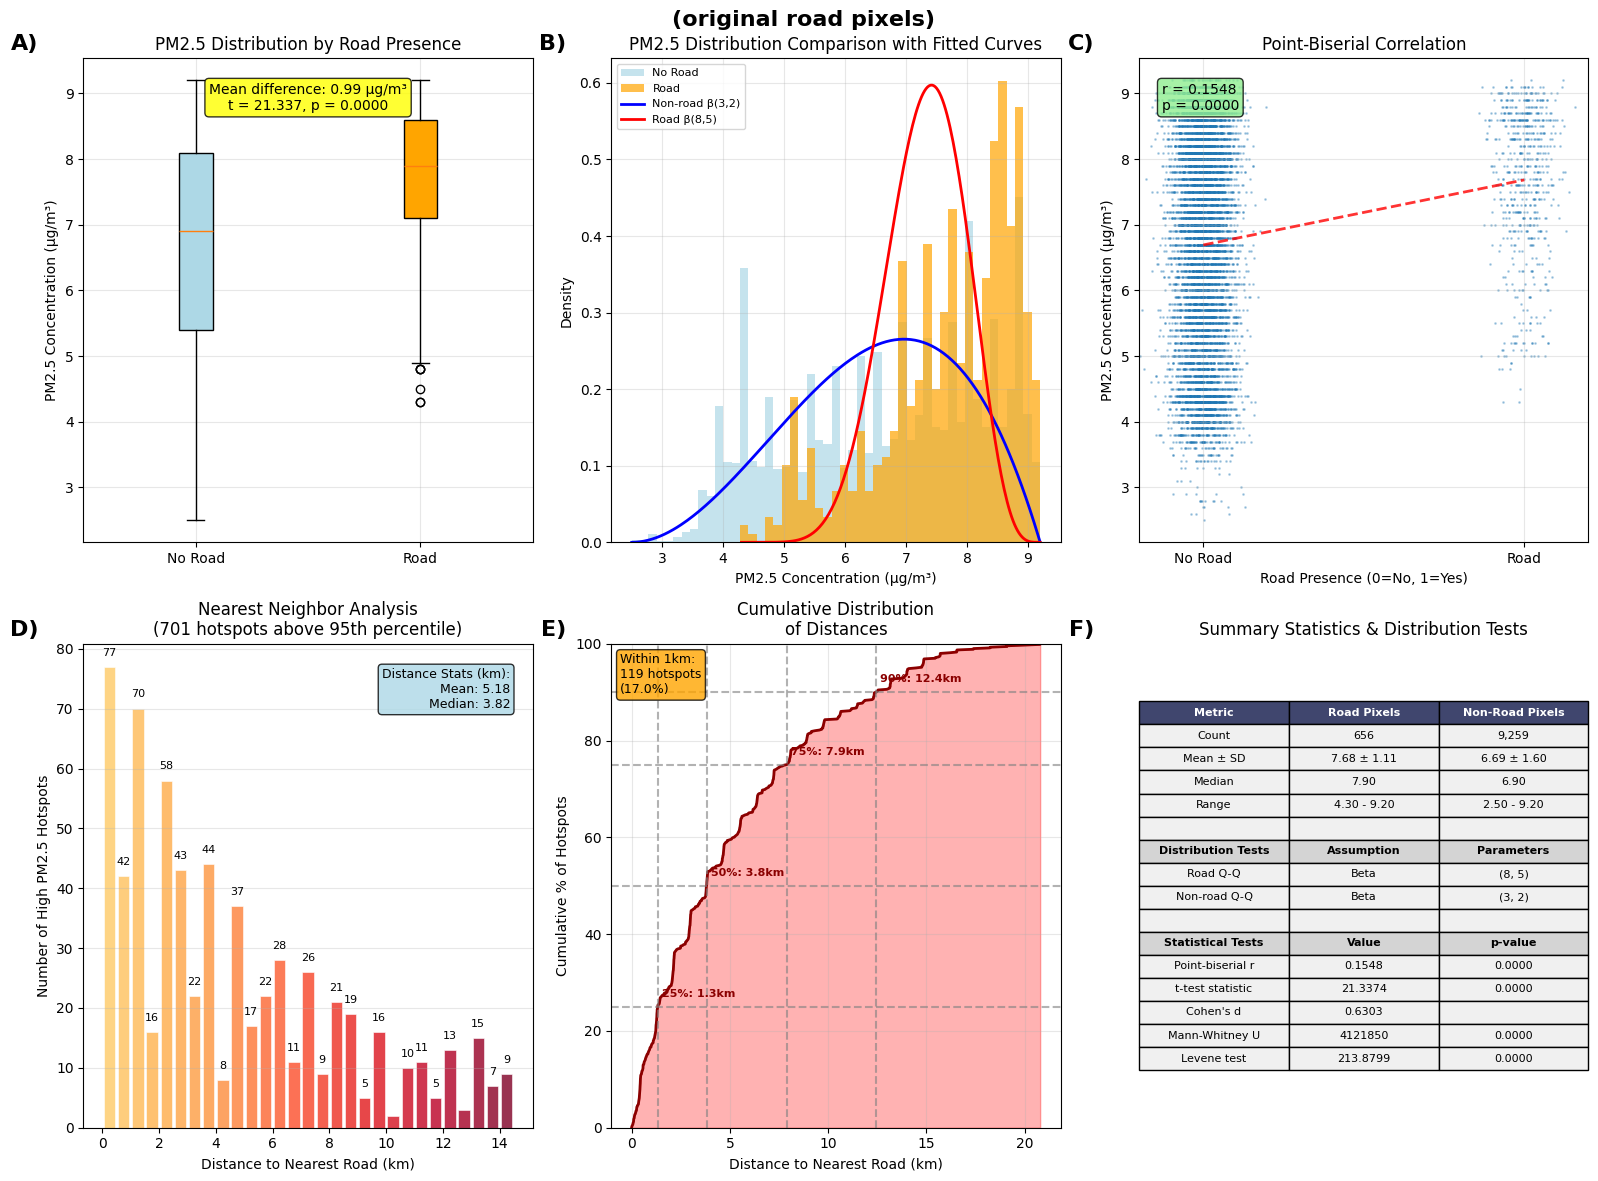

Running nearest neighbor analysis for correlation plot...
Creating nearest neighbor analysis...
✓ High PM2.5 threshold (95th percentile): 8.90 μg/m³
✓ Found 701 high PM2.5 hotspot pixels
Extracting road coordinates...
✓ Extracted 3,576,375 road coordinate points
Calculating nearest neighbor distances...
  Processed 701 / 701 hotspots

✓ Nearest neighbor analysis complete!
✓ High PM2.5 hotspots analyzed: 701
✓ Distance statistics (km):
   - Mean distance to nearest road: 5.18
   - Median distance: 3.82
   - 25th percentile: 1.34
   - 75th percentile: 7.90
   - 95th percentile: 14.48
✓ Hotspots within 1km of roads: 119 (17.0%)


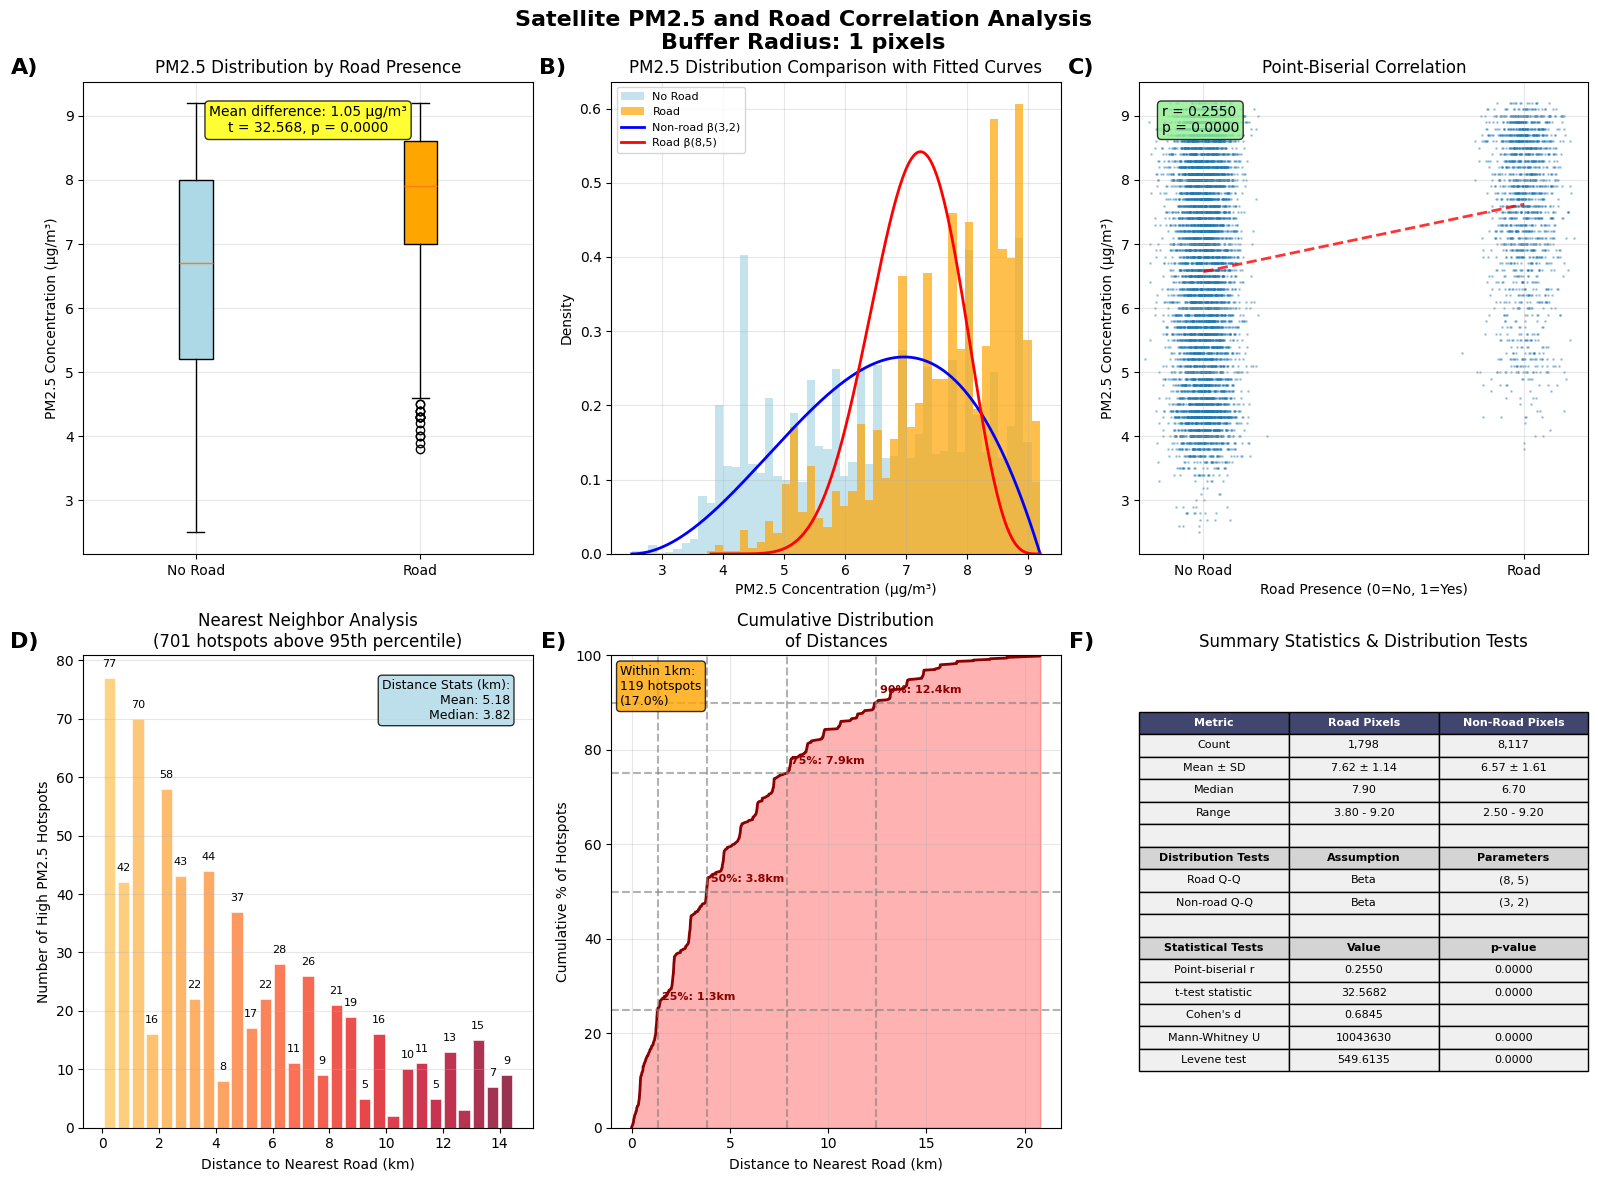

Running nearest neighbor analysis for correlation plot...
Creating nearest neighbor analysis...
✓ High PM2.5 threshold (95th percentile): 8.90 μg/m³
✓ Found 701 high PM2.5 hotspot pixels
Extracting road coordinates...
✓ Extracted 3,576,375 road coordinate points
Calculating nearest neighbor distances...
  Processed 701 / 701 hotspots

✓ Nearest neighbor analysis complete!
✓ High PM2.5 hotspots analyzed: 701
✓ Distance statistics (km):
   - Mean distance to nearest road: 5.18
   - Median distance: 3.82
   - 25th percentile: 1.34
   - 75th percentile: 7.90
   - 95th percentile: 14.48
✓ Hotspots within 1km of roads: 119 (17.0%)


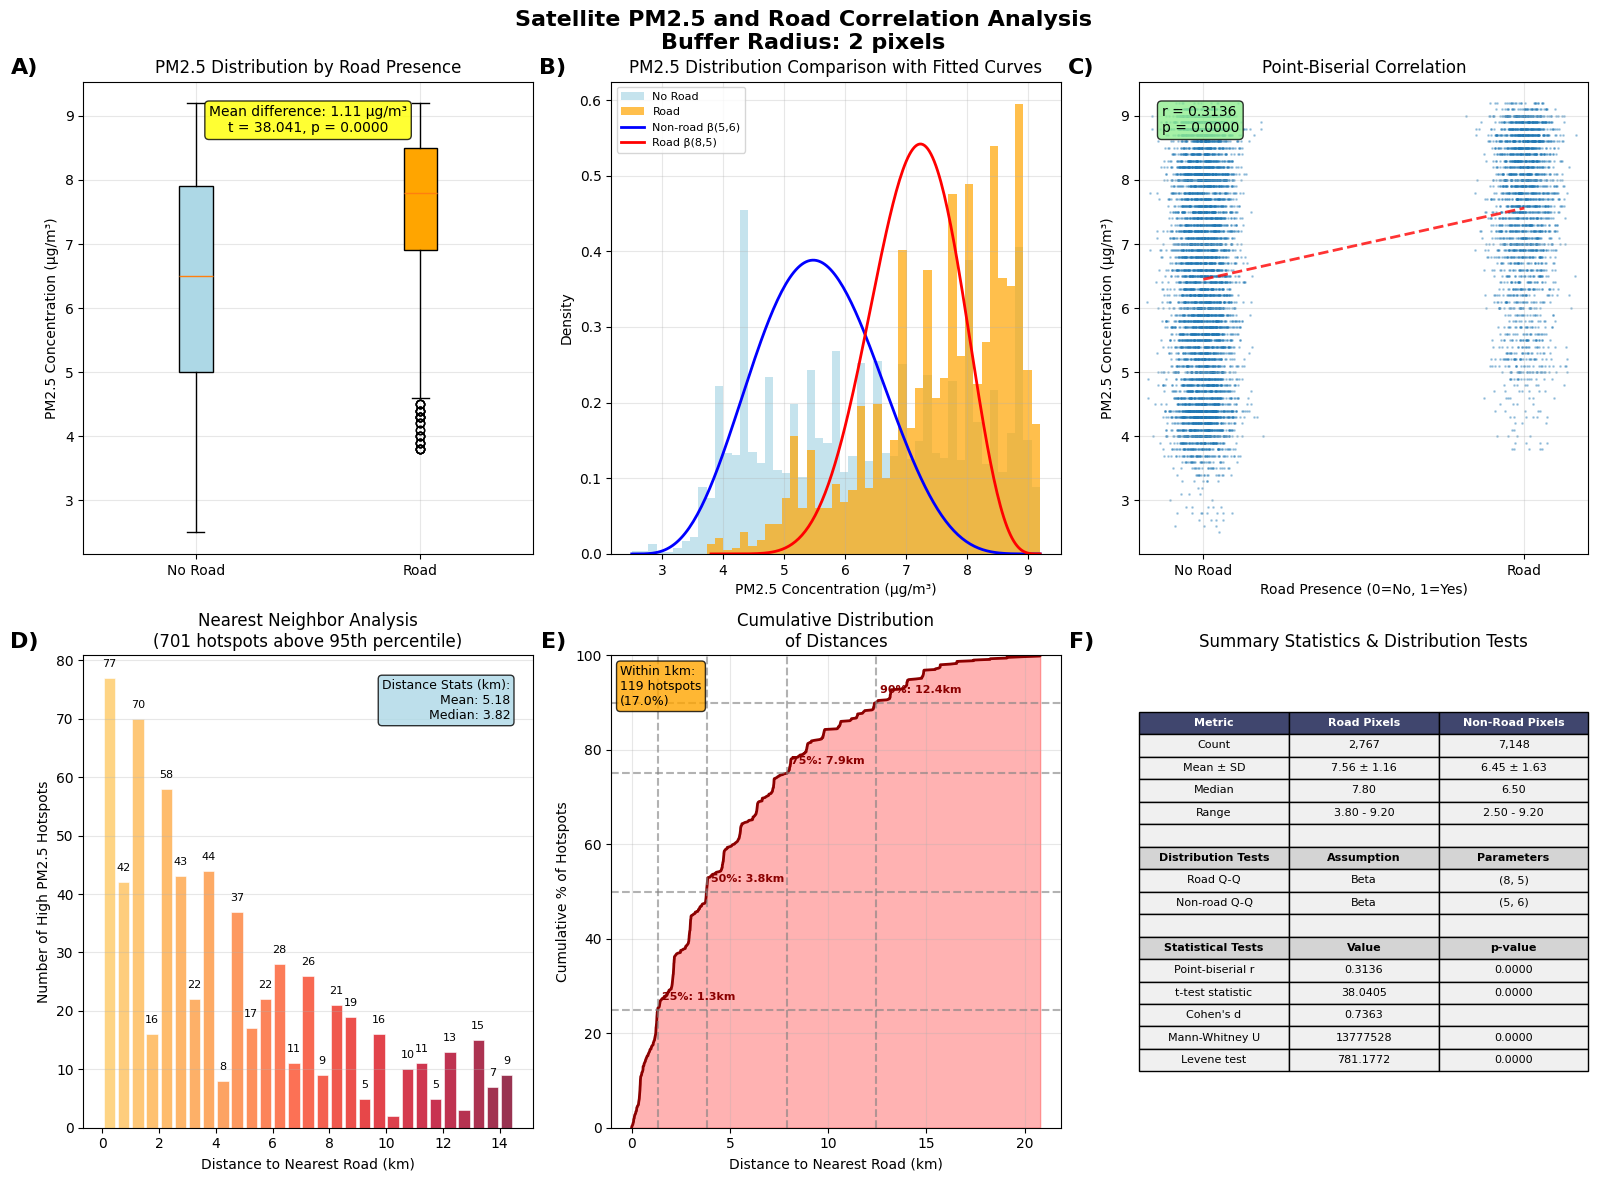


BUFFER RADIUS COMPARISON ANALYSIS

🔄 Analyzing buffer radius: 0

PIXEL-LEVEL ROAD CORRELATION ANALYSIS
Buffer radius: 0 (original)

📊 DATA PREPARATION:
   • Total pixels: 9,919
   • Valid PM2.5 pixels: 9,915
   • Analyzable pixels: 9,915

🛣️ ROAD PRESENCE BREAKDOWN:
   • Pixels with roads: 656
   • Pixels without roads: 9,259

📈 DESCRIPTIVE STATISTICS:
   Road pixels PM2.5 (μg/m³):
      Mean: 7.68 ± 1.11
      Median: 7.90
      Range: 4.30 - 9.20
   Non-road pixels PM2.5 (μg/m³):
      Mean: 6.69 ± 1.60
      Median: 6.90
      Range: 2.50 - 9.20

🔍 STATISTICAL ANALYSIS RESULTS:
   Point-biserial correlation:
      r = 0.1548
      p-value = 0.000000
   Independent samples t-test:
      t-statistic = 21.3374
      p-value = 0.000000
      Cohen's d = 0.6303
   Mann-Whitney U test:
      U-statistic = 4121850
      p-value = 0.000000
   Levene's test (equal variances):
      Statistic = 213.8799
      p-value = 0.000000

💡 INTERPRETATION:
   • Correlation: small positive correlation


In [16]:
# Create visualizations
if results_point:
    fig1 = analyzer.plot_correlation_analysis(
        results_point,
        road_dist='beta',
        road_params=(8, 5),
        non_road_dist='beta',
        non_road_params=(3, 2),
        include_nearest_neighbor=True,
        nn_percentile=95,
        nn_bin_width=0.5
    )
    plt.show()

if results_buffer1:
    fig2 = analyzer.plot_correlation_analysis(
        results_buffer1,
        road_dist='beta',
        road_params=(8, 5),
        non_road_dist='beta',
        non_road_params=(3, 2),
        include_nearest_neighbor=True,
        nn_percentile=95,
        nn_bin_width=0.5
    )
    plt.show()

if results_buffer2:
    fig3 = analyzer.plot_correlation_analysis(
        results_buffer2,
        road_dist='beta',
        road_params=(8, 5),
        non_road_dist='beta',
        non_road_params=(5, 6),
        include_nearest_neighbor=True,
        nn_percentile=95,
        nn_bin_width=0.5
    )
    plt.show()

# Compare different buffer radii
comparison = analyzer.run_buffer_comparison(buffer_radii=[0, 1, 2, 3], sample_size=50000)